# Predicting severity of road traffic accidents in UK

# 1. Description of the project

### The aim of the project

The specific aim of the project is to identify factors that influence the severity of casualties in road traffic accidents in the UK and create a model that, given a set of predictors, would determine said severity in future cases. 

We are going to use accuracy of the model as a success metric.
### The data
The work will be based on two datasets concerning road traffic accidents which took place in 2015 in UK (excluding Northern Ireland),  compiled by Department of Transport and downloaded from the [Data.gov.uk](https://data.gov.uk/dataset/road-accidents-safety-data) website.

The first dataset, Vehicles, contains nearly 260,000 entries, each referring to a single vehicle, and its driver, that took part in the road traffic accident in the year 2015. There could be more than one entry per accident in the table as some collisions involve more than one vehicle. The following is the data dictionary for the Vehicles table:

Column name |Description |Data type
---|---|---
Accident_Index |unique accident reference |object/string
Vehicle_Reference |code for number of vehicles involved in accident, starting from 1| int64
Vehicle_Type |code number for type of vehicle| int64
Towing_and_Articulation |code number for presence of trailers or articulation|int64
Vehicle_Manoeuvre|code number for actions immediately before the accident|int64
Vehicle_Location-Restricted_Lane|code number for vehicle loacation at the time of accident |int64
Junction_Location|code number for junction location of the vehicle|int64
Skidding_and_Overturning|code number for skidding & overturning|int64
Hit_Object_in_Carriageway|code numebr for object first hit by a vehicle|int64
Vehicle_Leaving_Carriageway|code number for the first occurrence of vehicle leaving the carriageway |int64
Hit_Object_off_Carriageway|code number for first object hit off carriageway|int64
1st_Point_of_Impact|the first point to come into contact with another vehicle, pedestrian or other object|int64
Was_Vehicle_Left_Hand_Drive? |code numeber for left/right hand drive|int64
Journey_Purpose_of_Driver|code number for journey purpose|int64
Sex_of_Driver |code number for driver's gender| int64
Age_of_Driver|age in years|int64
Age_Band_of_Driver |code number for age brakcets|int64
Engine_Capacity_CC|engine capacity|int64
Propulsion_Code|code number for type of propulsion|int64
Age_of_Vehicle|age in years|int64
Driver_IMD_Decile|code number for statistics on relative deprivation|int64
Driver_Home_Area_Type|code numebr for urban/small town/rural area type|int64
Vehicle_IMD_Decile|code number for statistics on relative deprivation|int64


The second dataset, Accidents, contains over 140,000 observations, each referring to a single road traffic accident. The following is the data dictionary for the Accidents table:

Column name |Description |Data type
---|---|---
Accident_Index | unique accident reference| object/string
Location_Easting_OSGR |full ordnance survey grid refrence number | float64
Location_Northing_OSGR|full ordnance survey grid refrence number|float64
Longitude |geographical coordinates| float64
Latitude |geographical coordinates|float64
Police_Force |code number of the police force in whose area the accident occurred| int64
Accident_Severity|code number for accident severity: fatal/severe/slight|int64
Number_of_Vehicles|number of vehicles involved in accident|int64
Number_of_Casualties|number of casualty records|int64
Date|date of accident|object
Day_of_Week|code number for day of week |int64
Time |time of accident|object
Local_Authority_(District) | code number of the local authority|int64
Local_Authority_(Highway) |code number of the local highway authority |object
1st_Road_Class|code number for the class of the road on which the accident occured|int64
1st_Road_Number|road number of the road on which the accident occured|int64
Road_Type|code number for the road type on which the accident occurred|int64
Speed_limit|general speed limit applicable to the road on which the accident occurred|int64
Junction_Detail|code number for the junction type which is closest to the accident|int64
Junction_Control|code number for type of junction control|int64
2nd_Road_Class|For 'junction accidents' only. Code number for the class of the road at the junction which has not already been coded as 1st Road Class|int64
2nd_Road_Number|road number of the second road on which the accident occured|int64
Pedestrian_Crossing-Human_Control|code number for the type of human control at the crossing|int64
Pedestrian_Crossing-Physical_Facilities|code number for physical facilites at the junction|int64
Light_Conditions|code number for light conditions|int64
Weather_Conditions|code number for weather conditions at the time and location of the accident|int64
Road_Surface_Conditions|code number for road surface condition at the time of the accident|int64
Special_Conditions_at_Site|code number for conditions on site of the accident|int64
Carriageway_Hazards|code number for objects not expected to be found in the carriageway|int64
Urban_or_Rural_Area |code number for type of area where the acicdent occured|int64
Did_Police_Officer_Attend_Scene_of_Accident|code number for whether or not a police officer attended the scene of the accident|int64
LSOA_of_Accident_Location |lower layer super output areas| object



### Proposed methods and models
The first stage of the project will consist of inspecting the datasets, cleaning data and creating new features where needed. This will be followed by the exploratory data analysis to summarize and visualise main trends and characteristics in the data such as distribution of features and the presence of possible outliers. This process is going to help us determine potential predictors for the modelling phase.

The second stage will consist of building, testing and optimizing various classification models. Their performance will be measured by accuracy score and other applicable metrics. The goal is to create a model that performs better than baseline in predicting the severity of road traffic accidents casualty. We propose to implement and test the following models:

* logistic regression
* k nearest neighbours
* random forest
* support vector machines

### Risks & assumptions
We assume that there is indeed an association between certain features in the dataset and severity of accidents and that these features can serve as predictors in the modeling phase of the project. We also assume that the data is as complete as possible and has been collected in fair and unbiased manner.

We can identify the following risks in this project:

1. Missing values and inconsistencies in the data. Data needs to be checked and cleaned in appropriate way that does not distort the underlying patterns in the datasets. 

2. Potential class imbalance in the target feature. This needs to be checked and remedied before running the models.

3. Assessing performance of the models and quantifying quality of predictions. We need to make sure to not rely on a single metric that could in many cases be biased.

### Potential additional datasets
The additional data that could help triangulate the findings based on the aforementioned two tables, would be data on road traffic accidents that don’t end up in injuries, which would help us to determine which factors can be associated with the severity of accidents. 
Another interesting data that would add to our analysis would be the list of makes and models of the cars involved in the accidents and data on breathalyzer tests.

# 2. Data cleaning and munging

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pylab import *
pd.options.display.max_columns = 999

### Reading in the vehicles table

In [2]:
vehicles = pd.read_csv('/Users/Mags/Desktop/Capstone_datasets/UK_accidents_data/RoadSafetyData_2015/Vehicles_2015.csv')
vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,201506E098757,2,9,0,18,0,8,0,0,0,0,3,1,6,1,45,7,1794,1,11,-1,1,-1
1,201506E098766,1,9,0,9,0,8,0,0,0,0,4,1,6,2,25,5,1582,2,1,-1,-1,-1
2,201506E098766,2,9,0,18,0,8,0,0,0,0,1,1,6,1,51,8,-1,-1,-1,-1,1,-1
3,201506E098777,1,20,0,4,0,0,0,0,0,0,1,1,1,1,50,8,4462,2,1,-1,1,-1
4,201506E098780,1,9,0,15,0,1,0,0,0,0,4,1,6,1,27,6,1598,2,-1,-1,1,-1


### Examining the table

In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257845 entries, 0 to 257844
Data columns (total 23 columns):
Accident_Index                      257845 non-null object
Vehicle_Reference                   257845 non-null int64
Vehicle_Type                        257845 non-null int64
Towing_and_Articulation             257845 non-null int64
Vehicle_Manoeuvre                   257845 non-null int64
Vehicle_Location-Restricted_Lane    257845 non-null int64
Junction_Location                   257845 non-null int64
Skidding_and_Overturning            257845 non-null int64
Hit_Object_in_Carriageway           257845 non-null int64
Vehicle_Leaving_Carriageway         257845 non-null int64
Hit_Object_off_Carriageway          257845 non-null int64
1st_Point_of_Impact                 257845 non-null int64
Was_Vehicle_Left_Hand_Drive?        257845 non-null int64
Journey_Purpose_of_Driver           257845 non-null int64
Sex_of_Driver                       257845 non-null int64
Age_of_Driver     

#### Dropping uneccessary columns

In [4]:
cols = ['Junction_Location','Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
        'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile']
vehicles.drop(cols, axis = 1, inplace=True)

vehicles = vehicles.sort_values(by=["Accident_Index", "Vehicle_Reference"])

In [5]:
#number of single vehicle accidents
veh_ref = vehicles.Vehicle_Reference.value_counts()
veh_ref[1]  - sum(veh_ref[1:]) 

22207

### Dealing with missing values
We don't have NaN values in this table but the data has been encoded in a such way, that missing values are marked with -1. Let's look closer:

In [6]:
vehicles.isin([-1]).sum()

Accident_Index                          0
Vehicle_Reference                       0
Vehicle_Type                           58
Towing_and_Articulation               249
Vehicle_Manoeuvre                     145
Vehicle_Location-Restricted_Lane      137
Skidding_and_Overturning              137
Vehicle_Leaving_Carriageway           124
1st_Point_of_Impact                   162
Was_Vehicle_Left_Hand_Drive?         1019
Journey_Purpose_of_Driver              24
Sex_of_Driver                          19
Age_of_Driver                       29828
Age_Band_of_Driver                  29828
Engine_Capacity_(CC)                72289
Propulsion_Code                     71773
Age_of_Vehicle                      81770
dtype: int64

We are going to look closer at the columns with missing values:
#### Vehicle_Type

In [7]:
vehicles.Vehicle_Type.value_counts().head()

9     182954
1      19440
19     13876
3       9234
5       7054
Name: Vehicle_Type, dtype: int64

As there is not many values missing and vehicle type number 9 (car) is a huge majority, I'm going to replace missing values with 9.

In [8]:
vehicles.loc[(vehicles.Vehicle_Type==-1), ["Vehicle_Type"]] = 9

#### Towing and articulation

In [9]:
vehicles.Towing_and_Articulation.value_counts()

 0    253690
 1      2679
 4       867
-1       249
 5       178
 3       120
 2        62
Name: Towing_and_Articulation, dtype: int64

As there is not many values missing and vehicle type number 0 (no tow) is a huge majority, I'm going to replace missing values with 0.

In [10]:
vehicles.loc[(vehicles.Towing_and_Articulation==-1), ["Towing_and_Articulation"]] = 0

#### Vehicle_Manouvre

In [11]:
vehicles.Vehicle_Manoeuvre.value_counts()

 18    121528
 9      26127
 4      20203
 3      16445
 5      10958
 2      10064
 17      9475
 7       8847
 16      8195
 13      5243
 1       3709
 10      3663
 14      3179
 12      2612
 11      2409
 6       2151
 15      1664
 8       1228
-1        145
Name: Vehicle_Manoeuvre, dtype: int64

As there is not many values missing and value 18 (Going ahead -other) is a huge majority, I'm going to replace missing values with 18

In [12]:
vehicles.loc[(vehicles.Vehicle_Manoeuvre==-1), ["Vehicle_Manoeuvre"]] = 18

#### Vehicle_Location-Restricted_Lane 

In [13]:
vehicles["Vehicle_Location-Restricted_Lane"].value_counts()

 0    252469
 9      2333
 2       835
 4       692
 6       570
 8       267
 5       240
-1       137
 7       128
 1       112
 3        62
Name: Vehicle_Location-Restricted_Lane, dtype: int64

As there is not many values missing and value 0 (not restricted lane) is a huge majority, I'm going to replace missing values with 0

In [14]:
vehicles.loc[(vehicles["Vehicle_Location-Restricted_Lane"]==-1), ["Vehicle_Location-Restricted_Lane"]] = 0

#### Skidding and overturning

In [15]:
vehicles.Skidding_and_Overturning.value_counts()

 0    231492
 1     17885
 5      4101
 2      4088
-1       137
 3        98
 4        44
Name: Skidding_and_Overturning, dtype: int64

As there is not many values missing and value 0 (None) is a huge majority, I'm going to replace missing values with 0

In [16]:
vehicles.loc[(vehicles["Skidding_and_Overturning"]==-1), ["Skidding_and_Overturning"]] = 0

#### Vehicle_Leaving_Carriageway

In [17]:
vehicles.Vehicle_Leaving_Carriageway.value_counts()

 0    230730
 1     14419
 7      7073
 2      1677
 4      1068
 3       957
 8       871
 5       736
 6       190
-1       124
Name: Vehicle_Leaving_Carriageway, dtype: int64

As there is not many values missing and value 0 (Did not leave carriageway) is a huge majority, I'm going to replace missing values with 0

In [18]:
vehicles.loc[(vehicles["Vehicle_Leaving_Carriageway"]==-1), ["Vehicle_Leaving_Carriageway"]] = 0

#### 1st_Point_of_Impact

In [19]:
vehicles["1st_Point_of_Impact"].value_counts()

 1    125882
 2     45644
 3     37583
 4     34035
 0     14539
-1       162
Name: 1st_Point_of_Impact, dtype: int64

As there is not many values missing and value 1 (No impact) is a majority, I'm going to replace missing values with 1

In [20]:
vehicles.loc[(vehicles["1st_Point_of_Impact"]==-1), ["1st_Point_of_Impact"]] = 1

#### Was_Vehicle_Left_Hand_Drive?

In [21]:
vehicles["Was_Vehicle_Left_Hand_Drive?"].value_counts()

 1    255480
 2      1346
-1      1019
Name: Was_Vehicle_Left_Hand_Drive?, dtype: int64

As the data concens UK we believe it is safe to assume that majority of the vehicles will be left hand drive, therefore I'm going to replace missing values with 1 (left-hand drive).

In [22]:
vehicles.loc[(vehicles["Was_Vehicle_Left_Hand_Drive?"]==-1), ["Was_Vehicle_Left_Hand_Drive?"]] = 1

#### Journey_Purpose_of_Driver

In [23]:
vehicles.Journey_Purpose_of_Driver.value_counts()

 6    186046
 1     39785
 2     26966
 3      2634
 5      1573
 4       817
-1        24
Name: Journey_Purpose_of_Driver, dtype: int64

In this column a huge majority of values is assigned to type 6, ie 'not known'. This means the column will probably not add any meaninful information to the analysis, therefore we are going to drop it.

#### Sex_of_Driver

In [24]:
vehicles["Sex_of_Driver"].value_counts()

 1    169251
 2     72046
 3     16529
-1        19
Name: Sex_of_Driver, dtype: int64

In this column number 3 means 'not known' so we are going to put missing values in this category.

In [25]:
vehicles.loc[(vehicles["Sex_of_Driver"]==-1), ["Sex_of_Driver"]] = 3

#### Age_of_Driver and Age_Bracket_of_Driver

There is a lot missing values in these categories, but it seems like quite an important feature which could be used in modeling later, therefore we will attempt to find a meaningful way to propagate the missing values. We are going
to focus on Age_Band category because Age as continouous variable could pose a bigger problem with imputing the missing data.

Let's look at proportions of existing age brackets data we have:

In [26]:
age_br = pd.DataFrame(vehicles.Age_Band_of_Driver[vehicles.Age_Band_of_Driver != -1].value_counts())
age_br["Percentage"] = (age_br["Age_Band_of_Driver"]/sum(age_br["Age_Band_of_Driver"])*100).astype(float)
age_br["Percentage"] = (age_br.Percentage + 0.5).astype(int) #to round the numbers 
age_br["Perc_Cum_Sum"] = age_br["Percentage"].cumsum()
age_br.reset_index(inplace=True)
age_br.rename(columns = {'index': 'Age_Band', 'Age_Band_of_Driver':'Age_Band_Count'}, inplace = True)
# age_br.sort_values(by='Age_Band', inplace=True)
# age_br.reset_index(drop=True)
age_br

,Age_Band,Age_Band_Count,Percentage,Perc_Cum_Sum
0,6,53295,23,23
1,7,44469,20,43
2,8,40600,18,61
3,5,29077,13,74
4,9,22168,10,84
5,4,18409,8,92
6,10,11206,5,97
7,11,6763,3,100
8,3,1527,1,101
9,2,436,0,101


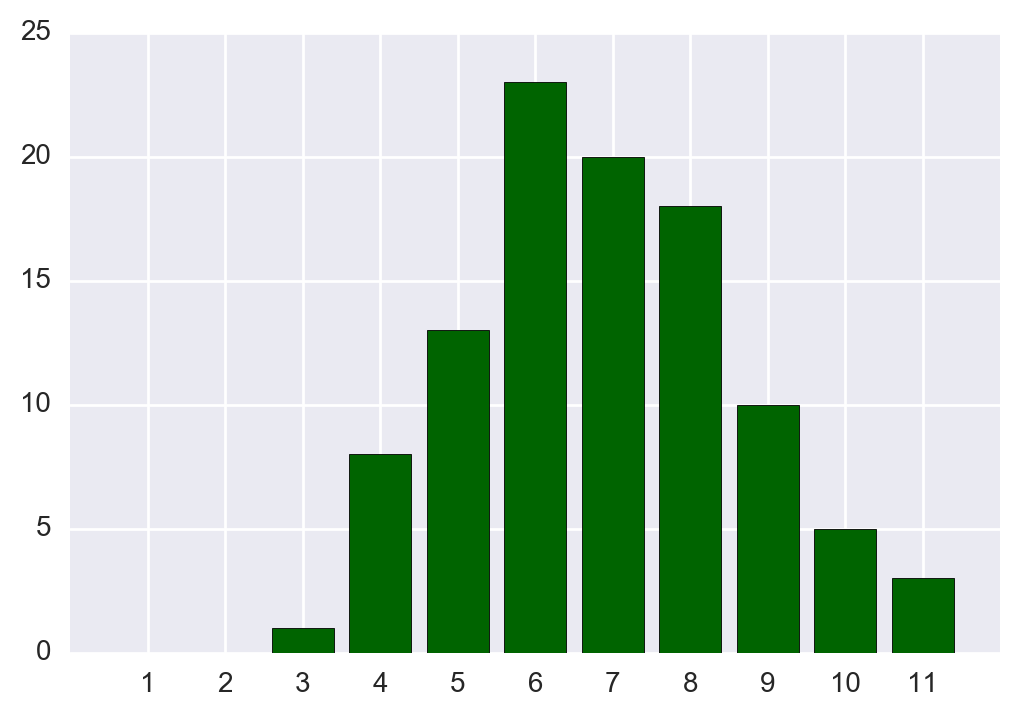

In [27]:
#Visualising the distribution
plt.bar(age_br["Age_Band"], age_br['Percentage'], align = 'center', color = 'darkgreen')
plt.xlim(0,12)
plt.xticks(arange(1,12))
plt.show()

Based on the above distribution of ratios of age bands in not null data we are going to populate missing values using randomly selected numbers from 1 to 101 which will fall in the ranges as wide as the age band ratios(percentages). The bigger the age band ratio, the more chances the number representing that band will be selected:

In [28]:
def get_age_band():
    num = np.random.randint(1,101)
    if num >=1 and num <=23:
        return 6
    elif num > 23 and num <=43:
        return 7
    elif num > 43 and num <= 61:
        return 8
    elif num > 61 and num <= 74:
        return 5
    elif num > 74 and num <= 84:
        return 9
    elif num > 84 and num <= 92:
        return 4
    elif num >92 and num <= 97:
        return 10
    elif num > 97 and num <= 100:
        return 11
    else:
        return 3

In [29]:
vehicles.Age_Band_of_Driver = vehicles.Age_Band_of_Driver.apply(lambda x: get_age_band() if x==-1 else x)

Checking if proportions didn't change:

In [30]:
age_br = pd.DataFrame(vehicles.Age_Band_of_Driver.value_counts())
age_br["Percentage"] = (age_br["Age_Band_of_Driver"]/sum(age_br["Age_Band_of_Driver"])*100).astype(float)
age_br["Percentage"] = (age_br.Percentage + 0.5).astype(int) #to round the numbers 
age_br["Perc_Cum_Sum"] = age_br["Percentage"].cumsum()
age_br.reset_index(inplace=True)
age_br.rename(columns = {'index': 'Age_Band', 'Age_Band_of_Driver':'Age_Band_Count'}, inplace = True)
age_br

,Age_Band,Age_Band_Count,Percentage,Perc_Cum_Sum
0,6,60150,23,23
1,7,50462,20,43
2,8,46052,18,61
3,5,32851,13,74
4,9,25140,10,84
5,4,20770,8,92
6,10,12736,5,97
7,11,7654,3,100
8,3,1527,1,101
9,2,436,0,101


#### Engine_Capacity_CC, Propulsion_Code  and Age_of_Vehicle
These three columns have about 1/3 values missing each. I don't believe there is a meaningful way in which we could populate these columns, therefore I'm going to drop them.

In [31]:
vehicles.drop(['Journey_Purpose_of_Driver', 'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Propulsion_Code'], 
              axis =1, inplace=True)
#Resetting index
vehicles.reset_index(inplace=True, drop=True)

### Features engineering
#### Vehicle type
There are 22 categories in this column, some of them with a very small representation. We can group them into larger classes which would help our analysis later. At the moment the classes are as follows:

code |	label
---|---
1|	Pedal cycle
2|	Motorcycle 50cc and under
3|	Motorcycle 125cc and under
4|	Motorcycle over 125cc and up to 500cc
5|	Motorcycle over 500cc
8|	Taxi/Private hire car
9|	Car
10|	Minibus (8 - 16 passenger seats)
11|	Bus or coach (17 or more pass seats)
16|	Ridden horse
17|	Agricultural vehicle
18|	Tram
19|	Van / Goods 3.5 tonnes mgw or under
20|	Goods over 3.5t. and under 7.5t
21|	Goods 7.5 tonnes mgw and over
22|	Mobility scooter
23|	Electric motorcycle
90|	Other vehicle
97|	Motorcycle - unknown cc
98|	Goods vehicle - unknown weight

We will simplify the groups by creating new ones as follows: Bicycle, motorcycle, car, minibus/bus, goods, other

In [32]:
def replace_veh_type(code):
    if code in [1]:
        return "bicycle"
    elif code in [2,3,4,5,23,97]:
        return "motorcycle"
    elif code in[8,9]:
        return "car"
    elif code in [10,11]:
        return "minibus/bus"
    elif code in [16,17, 18, 22, 90]:
        return "other"
    elif code in [19,20,21, 98]:
        return "goods"
    
vehicles.Vehicle_Type = vehicles.Vehicle_Type.apply(replace_veh_type)
vehicles.Vehicle_Type.value_counts()   

car            188432
motorcycle      20996
goods           20961
bicycle         19440
minibus/bus      5879
other            2137
Name: Vehicle_Type, dtype: int64

#### Towing and articulation
This category contains a few small groups and one large one (no tow). We can simplify this column by changing it into binary feature: 1 for tow / 0 for no tow:

In [33]:
vehicles.Towing_and_Articulation.value_counts()

0    253939
1      2679
4       867
5       178
3       120
2        62
Name: Towing_and_Articulation, dtype: int64

In [34]:
vehicles.Towing_and_Articulation = vehicles.Towing_and_Articulation.apply(lambda x: 0 if x==0 else 1)
vehicles.Towing_and_Articulation.value_counts()

0    253939
1      3906
Name: Towing_and_Articulation, dtype: int64

#### Vehicle_Location-Restricted_Lane, Skidding_and_Overturning and 	Vehicle_Leaving_Carriageway
Similarly as above, we change the above columns into binary features

In [35]:
print vehicles["Vehicle_Location-Restricted_Lane"].value_counts()
print vehicles["Skidding_and_Overturning"].value_counts()
print vehicles["Vehicle_Leaving_Carriageway"].value_counts()

0    252606
9      2333
2       835
4       692
6       570
8       267
5       240
7       128
1       112
3        62
Name: Vehicle_Location-Restricted_Lane, dtype: int64
0    231629
1     17885
5      4101
2      4088
3        98
4        44
Name: Skidding_and_Overturning, dtype: int64
0    230854
1     14419
7      7073
2      1677
4      1068
3       957
8       871
5       736
6       190
Name: Vehicle_Leaving_Carriageway, dtype: int64


In [36]:
vehicles["Vehicle_Location-Restricted_Lane"] = vehicles["Vehicle_Location-Restricted_Lane"].apply(lambda x: 0 if x==0 else 1)
print vehicles["Vehicle_Location-Restricted_Lane"].value_counts()
print 100*"="

vehicles["Skidding_and_Overturning"] = vehicles["Skidding_and_Overturning"].apply(lambda x: 0 if x==0 else 1)
print vehicles["Skidding_and_Overturning"].value_counts()
print 100*"="

vehicles["Vehicle_Leaving_Carriageway"] = vehicles["Vehicle_Leaving_Carriageway"].apply(lambda x: 0 if x==0 else 1)
print vehicles["Vehicle_Leaving_Carriageway"].value_counts()


0    252606
1      5239
Name: Vehicle_Location-Restricted_Lane, dtype: int64
0    231629
1     26216
Name: Skidding_and_Overturning, dtype: int64
0    230854
1     26991
Name: Vehicle_Leaving_Carriageway, dtype: int64


#### Vehicle_Manouvre

There is a large number of categories in this column, perhaps we could try and simpify it a little bit.

First, let's change the code numbers to actual labels and look at value counts:

In [37]:
mano = pd.read_csv('/Users/Mags/Desktop/Capstone_datasets/UK_accidents_data/contextCSVs/Vehicle_Manoeuvre.csv')
mano = mano.set_index('code')['label'].to_dict()
vehicles["Vehicle_Manoeuvre"].replace(mano, inplace=True)

In [38]:
vehicles.Vehicle_Manoeuvre.value_counts()

Going ahead other                      121673
Turning right                           26127
Slowing or stopping                     20203
Waiting to go - held up                 16445
Moving off                              10958
Parked                                  10064
Going ahead right-hand bend              9475
Turning left                             8847
Going ahead left-hand bend               8195
Overtaking moving vehicle - offside      5243
Reversing                                3709
Waiting to turn right                    3663
Overtaking static vehicle - offside      3179
Changing lane to right                   2612
Changing lane to left                    2409
U-turn                                   2151
Overtaking - nearside                    1664
Waiting to turn left                     1228
Name: Vehicle_Manoeuvre, dtype: int64

We can see that there are classes that could be logically merged, such as overtaking (nearside, offside, etc), waiting to turn (left, right) and some others, that would benefit from inclusion in a bit larger class. 

In [39]:
vehicles["Vehicle_Manoeuvre"] = vehicles["Vehicle_Manoeuvre"].apply(lambda x: 'Going ahead' if x=='Going ahead other'
                                                                   or x=='Going ahead right-hand bend' 
                                                                   or x=='Going ahead left-hand bend' else x)

vehicles["Vehicle_Manoeuvre"] = vehicles["Vehicle_Manoeuvre"].apply(lambda x: 'Overtaking' if x=='Overtaking moving vehicle - offside'
                                                                   or x=='Overtaking static vehicle - offside' 
                                                                   or x=='Overtaking - nearside' else x)

vehicles["Vehicle_Manoeuvre"] = vehicles["Vehicle_Manoeuvre"].apply(lambda x: 'Changing lane' if x=='Changing lane to right'
                                                                   or x=='Changing lane to left' else x)

vehicles["Vehicle_Manoeuvre"] = vehicles["Vehicle_Manoeuvre"].apply(lambda x: 'Waiting to turn' if x=='Waiting to turn left'
                                                                   or x=='Waiting to turn right' else x)

In [40]:
vehicles.Vehicle_Manoeuvre.value_counts()

Going ahead                139343
Turning right               26127
Slowing or stopping         20203
Waiting to go - held up     16445
Moving off                  10958
Overtaking                  10086
Parked                      10064
Turning left                 8847
Changing lane                5021
Waiting to turn              4891
Reversing                    3709
U-turn                       2151
Name: Vehicle_Manoeuvre, dtype: int64

#### Replacing code numbers with actual labels
For ease of reference and visualisation we replace code numbers with labels (labels info comes from reference files from the [Data.gov.uk](https://data.gov.uk/dataset/road-accidents-safety-data) website)

In [41]:

#1st point of impact
impact = {0:'No impact', 1:'Front', 2:'Back', 3:'Offside', 4:'Nearside'}
vehicles["1st_Point_of_Impact"].replace(impact, inplace=True)

#Sex of driver
gend = {1:'Male', 2:'Female', 3:'Unknown'}
vehicles["Sex_of_Driver"].replace(gend, inplace=True)

#Age bands
age_bands = pd.read_csv('/Users/Mags/Desktop/Capstone_datasets/UK_accidents_data/contextCSVs/Age_Band.csv')
age_bands = age_bands.set_index('code')['label'].to_dict()
vehicles["Age_Band_of_Driver"].replace(age_bands, inplace=True)

#### Vehicle Index
Lastly, as we don't have an unique identifier for each row in the vehicles table, which could become useful later, let's add one.

In [42]:
vehicles["Vehicle_Index"] = vehicles["Accident_Index"] +'.'+ vehicles["Vehicle_Reference"].map(str)

#### Saving cleaned df into csv file

In [43]:
vehicles.to_csv("/Users/Mags/Desktop/Capstone_datasets/UK_accidents_data/RoadSafetyData_2015/vehicles_cleaned.csv", index=False)

### Reading in the accidents table 

In [44]:
accidents = pd.read_csv('/Users/Mags/Desktop/Capstone_datasets/UK_accidents_data/RoadSafetyData_2015/Accidents_2015.csv', low_memory=False)
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,2,18:45,12,E09000020,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,2,07:50,12,E09000020,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,2,18:08,12,E09000020,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,3,07:40,12,E09000020,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,6,07:30,12,E09000020,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,2,E01002814


### Examining the table

In [45]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 32 columns):
Accident_Index                                 140056 non-null object
Location_Easting_OSGR                          140029 non-null float64
Location_Northing_OSGR                         140029 non-null float64
Longitude                                      140029 non-null float64
Latitude                                       140029 non-null float64
Police_Force                                   140056 non-null int64
Accident_Severity                              140056 non-null int64
Number_of_Vehicles                             140056 non-null int64
Number_of_Casualties                           140056 non-null int64
Date                                           140056 non-null object
Day_of_Week                                    140056 non-null int64
Time                                           140038 non-null object
Local_Authority_(District)                     140

### Dropping unneccessary columns

In [46]:
accidents.drop(['Longitude', 'Latitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Local_Authority_(District)', 
                'Local_Authority_(Highway)', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'
               ], axis =1, inplace=True)

### Dealing with missing values
Time is the only column where NaNs are present, however the data is encoded in such way that the missing data is marked with value of -1, therefore we will need to check for presence of -1 in the data too.

#### NaNs in Time column

In [47]:
#There is no good way of imputing the time of accident and there is only 18 values missing, 
#so we are going to drop the rows containing NaNs

accidents.dropna(axis=0, how='any', thresh=None, subset=['Time'], inplace=True)

#### Values encoded with -1

In [48]:
accidents.isin([-1]).sum()

Accident_Index                                 0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                1
Junction_Control                           56061
2nd_Road_Class                             56594
2nd_Road_Number                              705
Pedestrian_Crossing-Human_Control            140
Pedestrian_Crossing-Physical_Facilities      127
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditi

#### Junction detail

In [49]:
accidents[accidents.Junction_Detail ==-1]

,Accident_Index,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
27471,201504EF15406,4,3,2,1,24/11/2015,3,07:30,5,0,6,50,-1,-1,6,0,0,0,1,2,2,0,0,2


Looks like missing data, as 2nd_Road_Class has a value, so I'm going to drop this row.

In [50]:
accidents = accidents[accidents.Junction_Detail != -1]

#### Junction control

In [51]:
accidents[accidents.Junction_Control.isin([-1])].head(5)

,Accident_Index,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
7,201501BS70011,1,3,2,1,18/01/2015,1,15:30,6,0,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1
17,201501BS70022,1,3,2,1,25/01/2015,1,01:50,3,308,6,30,0,-1,-1,0,0,5,4,1,1,0,0,1
18,201501BS70023,1,3,1,1,24/01/2015,7,16:16,6,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1
27,201501BS70036,1,3,1,1,30/01/2015,6,07:50,3,4204,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1
30,201501BS70039,1,3,2,1,31/01/2015,7,00:10,3,3212,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1


In [52]:
#How many entries have both Junction Control and 2nd Road Class missing?
mask1 = (accidents.Junction_Control == -1) & (accidents["2nd_Road_Class"] == -1)
len(accidents[mask1])

55953

From the above we can see that missing values from  Junction Control column very much align with missing values from 2nd Road Class column. This is an indicator that they just might have been erroneously encloded, and should be zeroes, as in 'not at junction'. I am therefore going to assume that where values in both columns are -1, the accident happened not at the junction and reassign -1 values with 0s.

In [53]:
accidents.loc[mask1, ["Junction_Control", "2nd_Road_Class"]] =0
accidents.Junction_Control.value_counts()

 4    68648
 0    55953
 2    14455
 3      703
 1      171
-1      107
Name: Junction_Control, dtype: int64

That still leaves us with 107 missing valees in Junction Control. Let's take a look:

In [54]:
accidents[accidents.Junction_Control.isin([-1])].head()

,Accident_Index,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
25967,2015030002096,3,3,2,1,18/08/2015,3,12:16,6,0,6,30,9,-1,6,0,1,0,1,1,1,0,0,1
29931,201504WB15485,4,2,4,3,27/09/2015,1,13:20,5,0,6,60,0,-1,6,0,0,0,1,1,1,0,0,2
29932,201504WB15486,4,3,2,1,07/10/2015,4,15:25,4,5321,3,30,0,-1,3,589,0,1,1,9,-1,0,0,1
56354,2015200032417,20,3,1,1,09/11/2015,2,18:50,6,0,6,30,8,-1,6,0,0,0,4,1,1,0,0,1
56394,2015200032613,20,3,2,2,12/11/2015,5,09:20,6,0,6,30,1,-1,6,0,-1,-1,1,1,1,0,0,1


For the rows where Junction Detail is 0 I'm going to replace -1 in both Junction Control and 2nd Road columns with 0, as it means that there in fact was no junction. For the rest of missing entries I'm going to replace them with most popular value, ie 4 meaning 'uncotrolled'.

In [55]:
accidents.loc[(accidents.Junction_Detail==0), ["Junction_Control", "2nd_Road_Class", "2nd_Road_Number"]] =0
accidents.loc[(accidents.Junction_Control==-1), ["Junction_Control"]] = 4

#### 2nd_Road_Class and 2nd_Road_Number

In [56]:
accidents[accidents["2nd_Road_Class"].isin([-1])].head()

,Accident_Index,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
25286,2015030000284,3,3,2,2,03/02/2015,3,15:32,3,595,6,60,9,4,-1,-1,0,0,1,1,1,0,0,2
25293,2015030000310,3,3,2,1,07/02/2015,7,21:20,6,0,6,30,9,4,-1,-1,0,0,4,1,2,0,0,2
25308,2015030000352,3,3,2,1,09/02/2015,2,16:50,6,0,6,30,9,4,-1,-1,0,0,1,1,1,0,0,1
25320,2015030000381,3,3,2,1,14/02/2015,7,19:07,6,0,6,30,9,4,-1,-1,0,0,4,1,1,0,0,1
25321,2015030000382,3,3,1,1,14/02/2015,7,19:10,3,595,3,30,9,2,-1,-1,0,0,4,1,1,0,0,1


We replaced 2ndRoad columns with 0 earlier in cases where the values for Junction_Detail were 0. Now, for the entries where the remaining 2ndRoad_Class and 2nd_Road_Number are missing, I'm going to assume the road is unclassified and threfore replace missing values with 6 ('unclassified') and 0 for road number.

In [57]:
accidents.loc[(accidents["2nd_Road_Class"]==-1), ["2nd_Road_Class"]] = 6
accidents.loc[(accidents["2nd_Road_Number"]==-1), ["2nd_Road_Number"]] = 0

#### Pedestrian crossing columns

In [58]:
print accidents["Pedestrian_Crossing-Human_Control"].value_counts()
print 100*'='

print accidents["Pedestrian_Crossing-Physical_Facilities"].value_counts()
print 100*'='

#How many entries have values from both Pedestrian Crossing columns missing?
len(accidents[(accidents["Pedestrian_Crossing-Human_Control"] == -1) & 
              (accidents["Pedestrian_Crossing-Physical_Facilities"] == -1)])


 0    139182
 2       433
 1       282
-1       140
Name: Pedestrian_Crossing-Human_Control, dtype: int64
 0    113468
 5     10865
 4      7751
 1      4277
 8      3157
 7       392
-1       127
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64


115

I'm going to assume that where values are missing, that there is simply no pedestrian crossing (especially where both pedestrian columns have values of -1 it suggests an error in data collection) and set the value to zero.

In [59]:
accidents.loc[(accidents["Pedestrian_Crossing-Human_Control"]==-1), ["Pedestrian_Crossing-Human_Control"]] = 0
accidents.loc[(accidents["Pedestrian_Crossing-Physical_Facilities"]==-1), ["Pedestrian_Crossing-Physical_Facilities"]] = 0

#### Road surface conditions 

In [60]:
accidents.Road_Surface_Conditions.value_counts()

 1    101343
 2     36232
 4      1460
 3       534
-1       284
 5       184
Name: Road_Surface_Conditions, dtype: int64

We are going to fill missing values with the most common value, ie 1:

In [61]:
accidents.loc[(accidents.Road_Surface_Conditions==-1), ["Road_Surface_Conditions"]] = 1

#### Special conditions at site

In [62]:
accidents.Special_Conditions_at_Site.value_counts()

 0    136804
 4      1597
 7       424
 6       384
 5       299
 1       212
 3       160
-1       106
 2        51
Name: Special_Conditions_at_Site, dtype: int64

Assumming error in data collection, we are going to replace missing values with 0, meaning: None.

In [63]:
accidents.loc[(accidents.Special_Conditions_at_Site==-1), ["Special_Conditions_at_Site"]] = 0

#### Carriageway hazards

In [64]:
accidents.Carriageway_Hazards.value_counts()

 0    137730
 2       929
 7       610
 6       307
 3       204
 1       162
-1        95
Name: Carriageway_Hazards, dtype: int64

Assuming error in data collection, we are going to replace the missing values with 0, meaning None.

In [65]:
accidents.loc[(accidents.Carriageway_Hazards==-1), ["Carriageway_Hazards"]] = 0

#### Weather conditions

Weather conditions column does not contain NaN or -1 values, it does hovewer contain value 9, which is a number code for 'unknown'. This is reference table for weather:

code|	label
---|---
1|	Fine no high winds
2|	Raining no high winds
3|	Snowing no high winds
4|	Fine + high winds
5|	Raining + high winds
6|	Snowing + high winds
7|	Fog or mist
8|	Other
9|	Unknown
-1|	Data missing or out of range


Let's look at value counts:

In [66]:
accidents.Weather_Conditions.value_counts()

1    113936
2     15557
9      2467
5      2365
4      2352
8      1984
7       662
3       540
6       174
Name: Weather_Conditions, dtype: int64

As there is category 'Other' which doesn't really give us any meaningful information about the conditions at the time of the accident, we will merge 'Other' and 'Unknown' classes.

In [67]:
accidents["Weather_Conditions"] = accidents["Weather_Conditions"].apply(lambda x: 8 if x==9 else x)

### Feature engineering
#### Hour of accident

I'm going to extract a full hour from Time column. If number of minutes is more than 30, it will count as the next hour.

In [68]:
accidents.Time[:5]

0    18:45
1    07:50
2    18:08
3    07:40
4    07:30
Name: Time, dtype: object

In [69]:
def extract_hour(time):
    if int(time[-2:]) <=30:
        hour = int(time[:2])
    else:
        if int(time[:2]) == 23:
            hour = 0
        else:
            hour = int(time[:2]) + 1
    return hour
        

In [70]:
accidents["Hour"] = accidents.Time.apply(extract_hour)

#### Month

I'm going to extract month from Date column:

In [71]:
accidents['Date'] = pd.to_datetime(accidents['Date'], dayfirst = True)
accidents['Month'] = accidents['Date'].dt.month

#### Pedestrian Crossing
There are two columns for pedestrian crossing: Human Control and Physical Facilities. Based on these columns I'm going to create a new one, that would simply indicate whether the accident happened at or near pedestrian crossing or not:

In [72]:
#Creating a new column where 0 means 'no pedestrian crossing' and 1 means 'pedestrian crossing'
accidents["Ped_Crossing"] = np.where((accidents['Pedestrian_Crossing-Human_Control'] != 0) | 
                                     (accidents["Pedestrian_Crossing-Physical_Facilities"] != 0), 1, 0)

#Dropping two redundant 'Pedestrian crossing' columns
accidents.drop(['Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities'], axis =1, inplace=True)

#### Special conditions at site & Carriageway_Hazards
As the majorty classes in both of the above columns ar no special condtions / no hazards, I'm going to turn them into binary columns:

In [73]:
accidents.Special_Conditions_at_Site = accidents.Special_Conditions_at_Site.apply(lambda x: 0 if x==0 else 1)
accidents.Carriageway_Hazards =  accidents.Carriageway_Hazards.apply(lambda x: 0 if x==0 else 1)
print accidents.Special_Conditions_at_Site.value_counts()
print 100*'='
print accidents.Carriageway_Hazards.value_counts()

0    136910
1      3127
Name: Special_Conditions_at_Site, dtype: int64
0    137825
1      2212
Name: Carriageway_Hazards, dtype: int64


#### Replacing code numbers

For ease of analysis and visualisation, we are going replace code numbers in columns with actual values they represent. The data dictionaries have been provided on the Data.gov.uk website as a collection of csv files (one file per column) and have been either read into Pandas where the dictionary is quite long, or simply used as a reference and typed in manually for short dictionaries.

In [74]:
#Police force
pol_for = pd.read_csv('/Users/Mags/Desktop/Capstone_datasets/UK_accidents_data/contextCSVs/Police_Force.csv')
pol_for = pol_for.set_index('code')['label'].to_dict()
accidents["Police_Force"].replace(pol_for, inplace=True)

#Accident severity
acc_sev = {1: 'Fatal', 2:'Serious', 3:'Slight'}
accidents["Accident_Severity"].replace(acc_sev, inplace=True)

#Day of week
dow = {1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'}
accidents["Day_of_Week"].replace(dow, inplace=True)

#1st Road Class
rd_cl = {1: 'Mtwy', 2:'A(M)', 3:'A', 4:'B', 5:'C', 6:'Unclassified'}
accidents["1st_Road_Class"].replace(rd_cl, inplace=True)

#Road_type
rd_tp = {1:'Roundabout', 2:'One way street', 3:'Dual cgwy', 6:'Single cgwy',
         7:'Slip road', 9:'Unknown', 12:'One way street/Slip road'}
accidents["Road_Type"].replace(rd_tp, inplace=True)

#Junction detail
jun_det = pd.read_csv('/Users/Mags/Desktop/Capstone_datasets/UK_accidents_data/contextCSVs/Junction_Detail.csv')
jun_det = jun_det.set_index('code')['label'].to_dict()
accidents["Junction_Detail"].replace(jun_det, inplace=True)

#Junction Control
jun_con = {0:'Not at junct', 1:'Auth person', 2:'Auto traffic signal',
           3:'Stop sign', 4:'Give way/uncontr'}
accidents["Junction_Control"].replace(jun_con, inplace=True)

#2nd Road Class
rd_cl2 = {0:'Not at junct', 1: 'Mtwy', 2:'A(M)', 3:'A', 4:'B', 5:'C', 6:'Unclassified'}
accidents["2nd_Road_Class"].replace(rd_cl2, inplace=True)

#Light Conditions
light = {1:'Daylight', 4:'Dk-lit', 5:'Dk-unlit', 6:'Dk-no light', 7:'Dk-light unknown'}
accidents["Light_Conditions"].replace(light, inplace=True)

#Weather Condtions
weather = {1:'Fine/no wind', 2:'Rain/no wind', 3:'Snow/no wind', 4: 'Fine/wind', 5: 'Rain/wind', 6: 'Snow/wind',
          7:'Fog', 8:'Other', 9:'Unknown'}
accidents["Weather_Conditions"].replace(weather, inplace=True)

#Road surface condtions
surf = {1:'Dry', 2:'Wet', 3:'Snow', 4:'Frost/ice', 5:'Flood', 6:'Oil', 7:'Mud'}
accidents["Road_Surface_Conditions"].replace(surf, inplace=True)

#Urban or Rural Area
urb = {1:'Urban', 2:'Rural', 3:'Unallocated'}
accidents["Urban_or_Rural_Area"].replace(urb, inplace=True)

#Month
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
         11:'Nov', 12:'Dec'}
accidents["Month"].replace(months, inplace=True)


#### Saving the cleaned table in a new csv file

In [75]:
accidents.to_csv("/Users/Mags/Desktop/Capstone_datasets/UK_accidents_data/RoadSafetyData_2015/accidents_cleaned.csv", index=False)

# 3. Data analysis and visualisation

## 1. Vehicles
### Reading in the table

In [76]:
vehicles = pd.read_csv('/Users/Mags/Desktop/Capstone_datasets/UK_accidents_data/RoadSafetyData_2015/vehicles_cleaned.csv')
vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Skidding_and_Overturning,Vehicle_Leaving_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Vehicle_Index
0,201501BS70001,1,goods,0,Turning right,0,0,0,Front,1,Male,-1,36 - 45,201501BS70001.1
1,201501BS70002,1,car,0,Turning right,0,0,0,Front,1,Male,-1,21 - 25,201501BS70002.1
2,201501BS70004,1,car,0,Turning right,0,0,0,Front,1,Male,30,26 - 35,201501BS70004.1
3,201501BS70005,1,car,0,Turning right,0,0,0,Front,1,Male,-1,21 - 25,201501BS70005.1
4,201501BS70008,1,bicycle,0,Going ahead,0,0,0,No impact,1,Male,48,46 - 55,201501BS70008.1


### Examining the data

In [77]:
vehicles.describe()

,Vehicle_Reference,Towing_and_Articulation,Vehicle_Location-Restricted_Lane,Skidding_and_Overturning,Vehicle_Leaving_Carriageway,Was_Vehicle_Left_Hand_Drive?,Age_of_Driver
count,257845.000000,257845.000000,257845.000000,257845.000000,257845.000000,257845.000000,257845.000000
mean,1.557614,0.015149,0.020318,0.101673,0.104679,1.005220,35.406550
std,0.762971,0.122144,0.141087,0.302219,0.306140,0.072062,20.102565
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,49.000000
max,37.000000,1.000000,1.000000,1.000000,1.000000,2.000000,97.000000


There are several features in the table at which we want to take a closer look, particularly the distribution of the age of the drivers, their gender as well as vehicle types and vehicle manoeuvres.

#### Age and gender

In [78]:
vehicles.Age_Band_of_Driver.value_counts()

26 - 35    60150
36 - 45    50462
46 - 55    46052
21 - 25    32851
56 - 65    25140
16 - 20    20770
66 - 75    12736
Over 75     7654
11 - 15     1527
6 - 10       436
0 - 5         67
Name: Age_Band_of_Driver, dtype: int64

In [79]:
age_gen  = vehicles.groupby(by=['Age_Band_of_Driver', 'Sex_of_Driver']).sum().iloc[:,:1]
age_gen = age_gen.unstack(level=0) #.plot(kind='bar', subplots=False)
age_gen.columns = age_gen.columns.droplevel()
age_gen.fillna(0, inplace=True)
age_gen = age_gen.T
age_gen.reset_index(inplace=True)
age_gen.columns.name = None
age_gen = age_gen.reindex([0,8,1,2,3,4,5,6,7,9,10])
age_gen

,Age_Band_of_Driver,Female,Male,Unknown
0,0 - 5,25.0,90.0,3.0
8,6 - 10,162.0,557.0,0.0
1,11 - 15,292.0,2189.0,1.0
2,16 - 20,7598.0,20389.0,2264.0
3,21 - 25,14729.0,30908.0,3543.0
4,26 - 35,27292.0,59198.0,6825.0
5,36 - 45,23496.0,51450.0,5792.0
6,46 - 55,20581.0,49000.0,4954.0
7,56 - 65,10364.0,27167.0,2771.0
9,66 - 75,5234.0,12854.0,1431.0


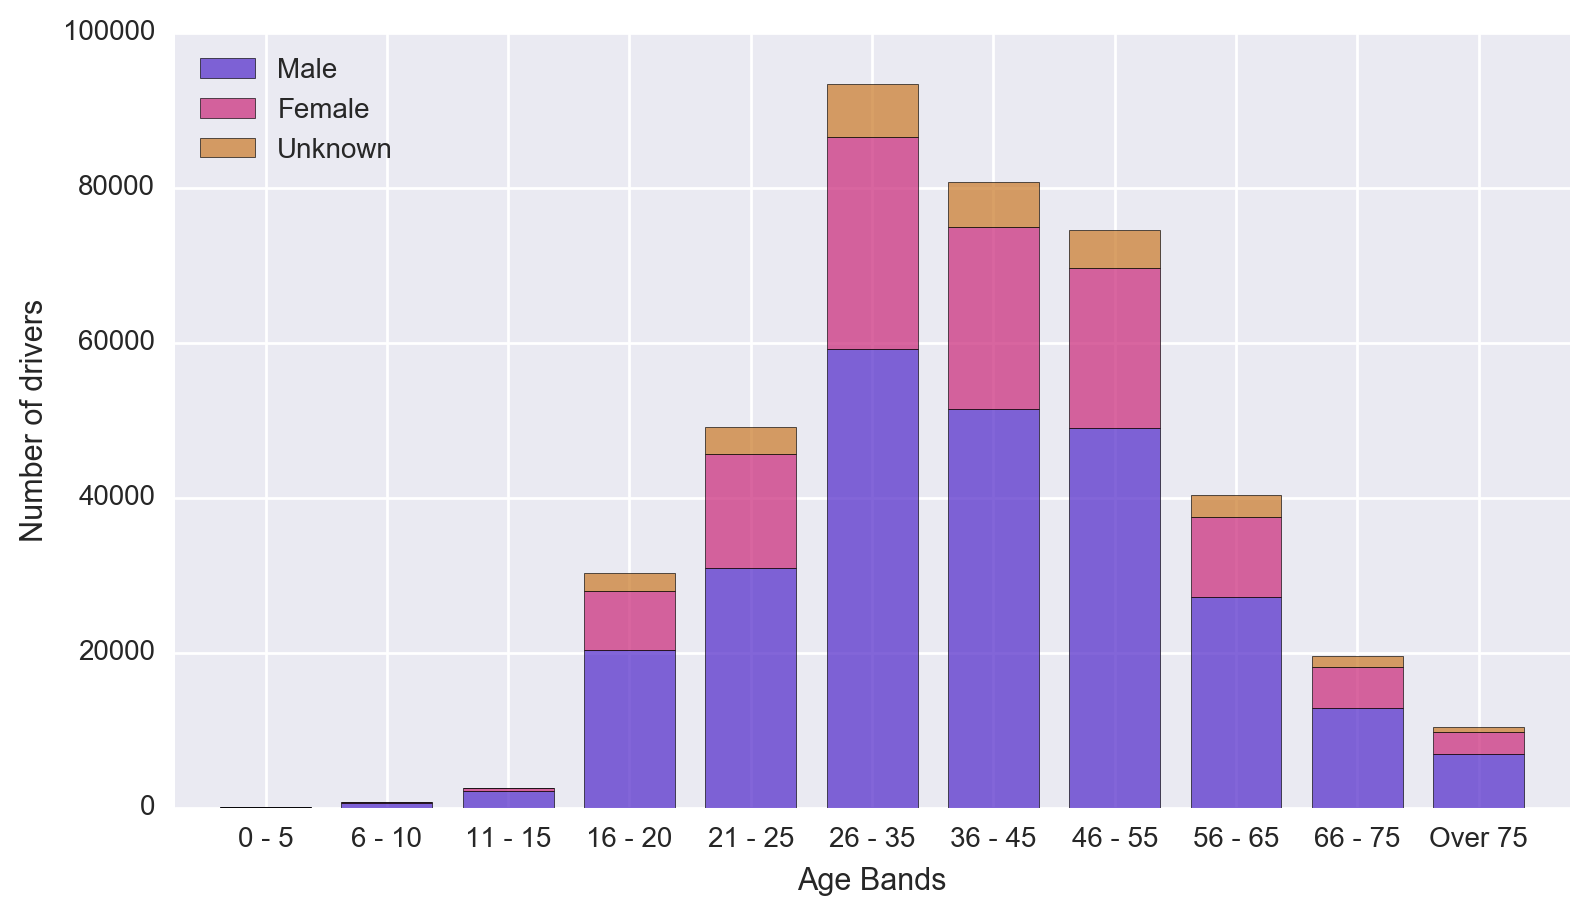

In [80]:
f, ax1 = plt.subplots(1, figsize=(9,5))
bar_width = 0.75
bar_l = [i+1 for i in range(len(age_gen['Female']))]
tick_pos = [i+(bar_width/2) for i in bar_l]


ax1.bar(bar_l, age_gen['Male'], width=bar_width, label='Male', alpha=0.75, color='#5933cc')

ax1.bar(bar_l, age_gen['Female'], width=bar_width, bottom=age_gen['Male'], label='Female', alpha=0.75, color='#cc3380')

ax1.bar(bar_l, age_gen['Unknown'], width=bar_width, bottom=[i+j for i,j in zip(age_gen['Male'],age_gen['Female'])],
        label='Unknown', alpha=0.75, color='#cc8033')

plt.xticks(tick_pos, age_gen['Age_Band_of_Driver'])
ax1.set_ylabel("Number of drivers")
ax1.set_xlabel("Age Bands")
plt.legend(loc=2)

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.show()

The age bands with the largest count of accidents are 26-35, 36-45 and 46-55 and, as expected, the number of male drivers involved in the accidents is much lager than the number of femal drivers.

We can see that there is a category for a very young 'drivers'. Let's examine these entries with a goal of establishing whether or not they are legitimate:

In [81]:
vehicles[vehicles.Age_Band_of_Driver=='0 - 5'].head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Skidding_and_Overturning,Vehicle_Leaving_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Vehicle_Index
1316,201501CP00131,1,bicycle,0,Going ahead,0,0,0,Front,1,Female,3,0 - 5,201501CP00131.1
8648,201501GD10260,2,bicycle,0,Going ahead,0,0,0,Front,1,Male,3,0 - 5,201501GD10260.2
13630,201501JI40480,2,bicycle,0,Going ahead,0,0,0,Offside,1,Male,5,0 - 5,201501JI40480.2
15981,201501KF60396,2,bicycle,0,Going ahead,1,0,0,Offside,1,Male,3,0 - 5,201501KF60396.2
17502,201501KG70426,2,bicycle,0,Going ahead,0,0,0,Front,1,Male,5,0 - 5,201501KG70426.2


From the above we can see that all the 'drivers' in the 0-5 age brackets have been 'driving' bicycles. Thus we can assume that they were children involved in the accindents when cycling and that the entries are legitimate.

#### Vehicle types

Next, let's look at the distribution of the vehicle types.

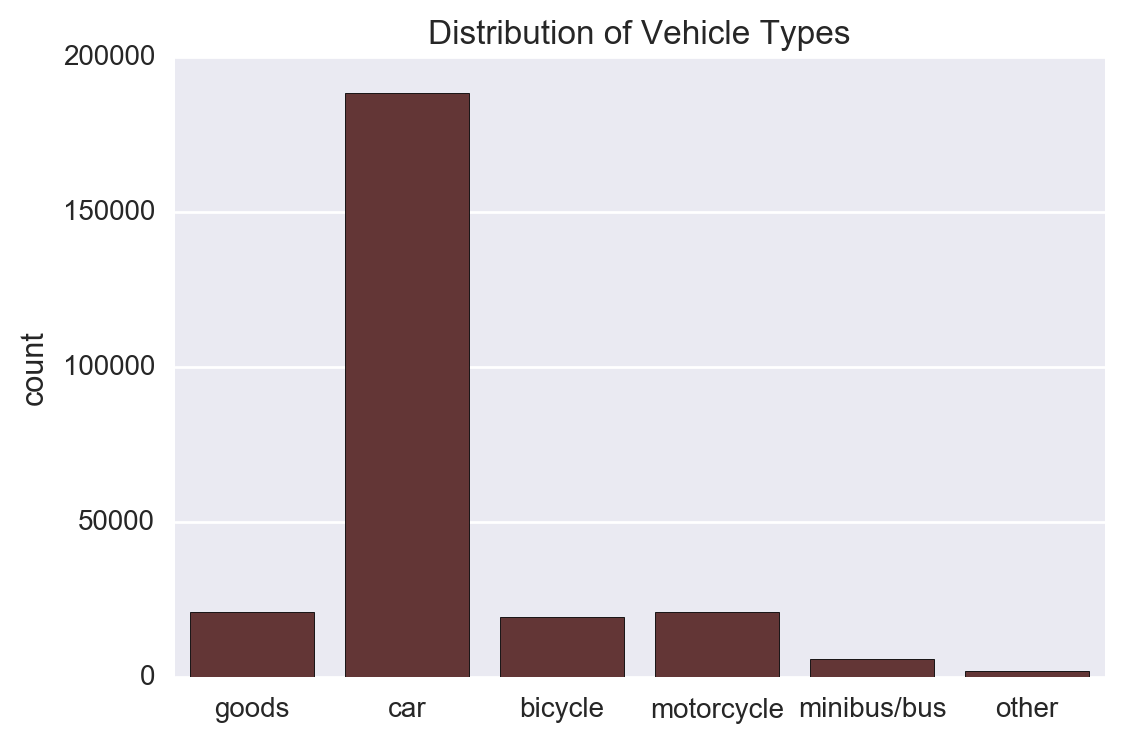

In [82]:
plt.figure(figsize = (6, 4))
sns.countplot(x="Vehicle_Type", data=vehicles, color='#6b2e2e')
plt.xlabel("")
plt.title("Distribution of Vehicle Types")
plt.show()

The largest group of vehicles involved in accidents are cars.

#### Distribution of vehicle manouvres

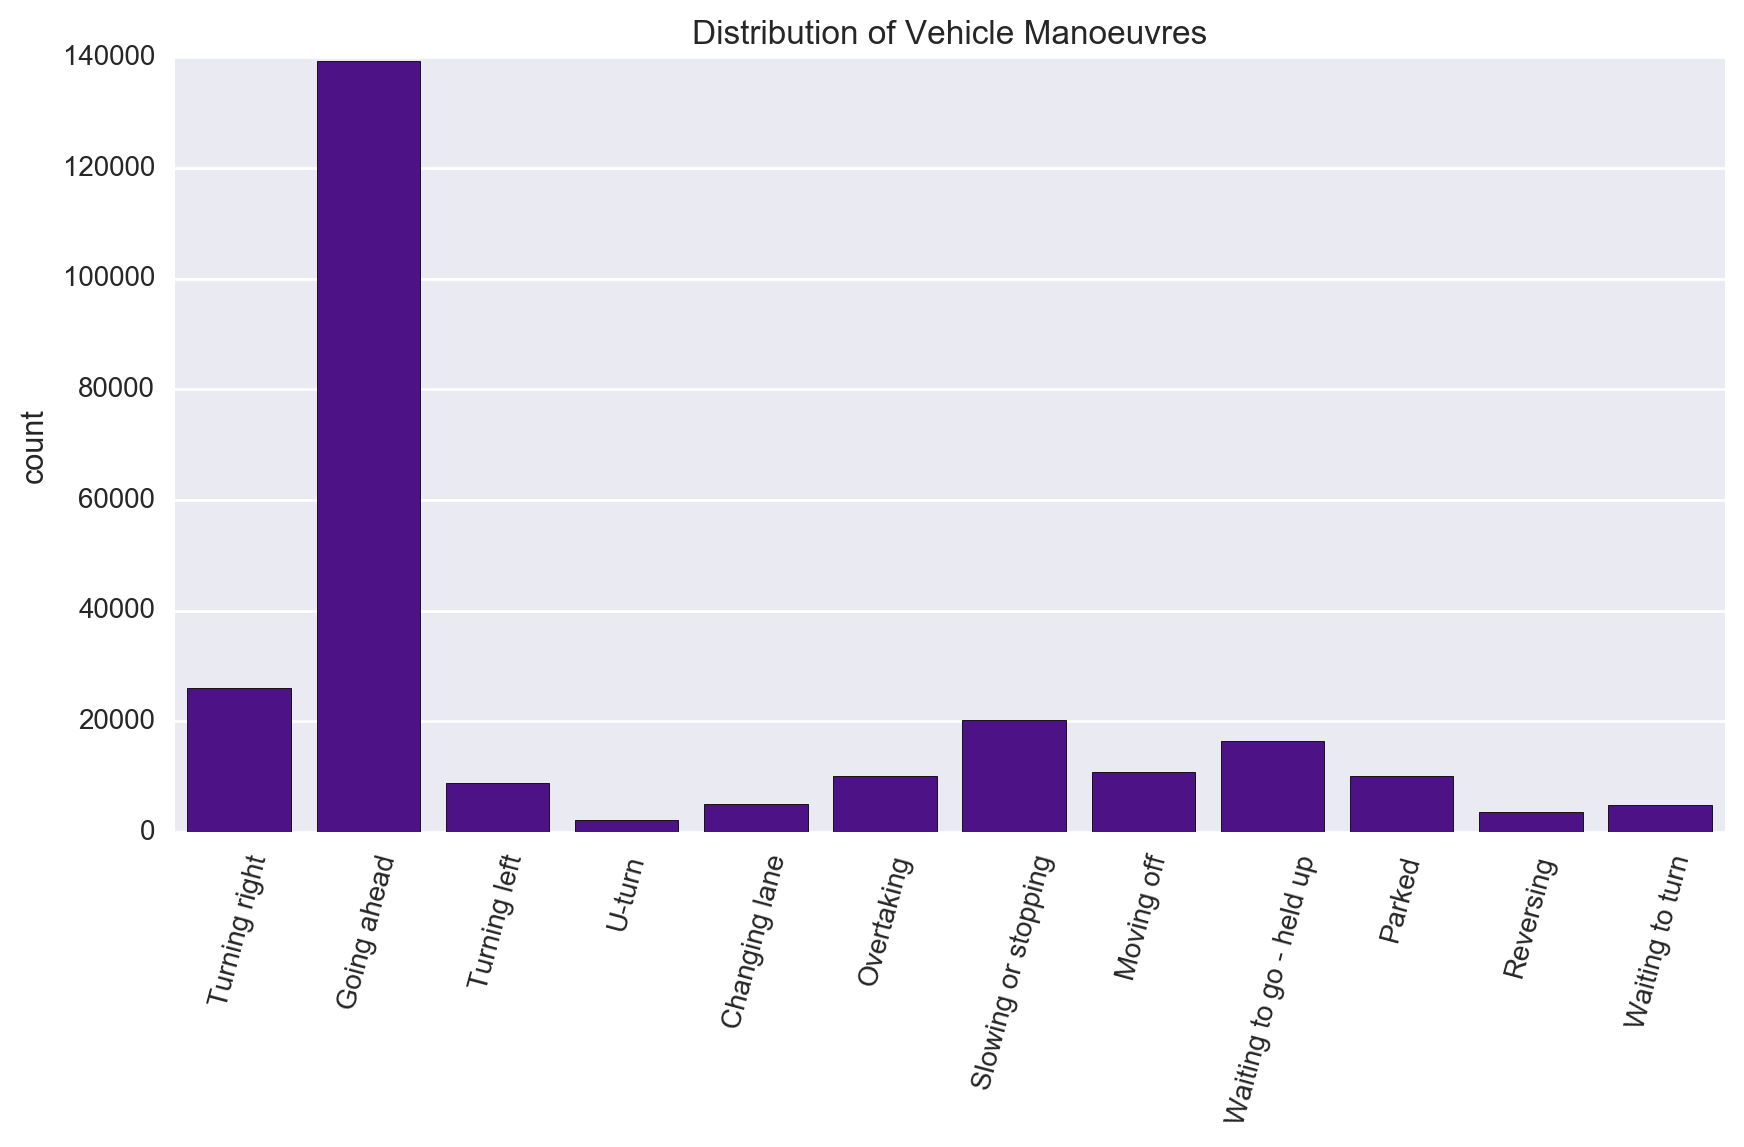

In [83]:
plt.figure(figsize = (10, 5))
sns.countplot(x="Vehicle_Manoeuvre", data=vehicles, color='#4d0099')
plt.xlabel("")
plt.title("Distribution of Vehicle Manoeuvres")
plt.xticks(rotation=75)
plt.show()

Quite surprisingly, the most vehicles have been involved in the accidents when driving ahead, not when performing any manouvres. Th next most numerous group is vehicles turning right.


## 2. Accidents

### Reading in the table 

In [84]:
accidents = pd.read_csv('/Users/Mags/Desktop/Capstone_datasets/UK_accidents_data/RoadSafetyData_2015/accidents_cleaned.csv')
accidents.head()

,Accident_Index,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Month,Ped_Crossing
0,201501BS70001,Metropolitan Police,Slight,1,1,2015-01-12,Mon,18:45,C,0,Single cgwy,30,T or staggered junction,Give way/uncontr,Unclassified,0,Dk-lit,Fine/no wind,Dry,0,0,Urban,19,Jan,0
1,201501BS70002,Metropolitan Police,Slight,1,1,2015-01-12,Mon,07:50,Unclassified,0,Single cgwy,30,T or staggered junction,Give way/uncontr,A,3218,Daylight,Fine/no wind,Dry,0,0,Urban,8,Jan,0
2,201501BS70004,Metropolitan Police,Slight,1,1,2015-01-12,Mon,18:08,B,415,Single cgwy,30,Mini-roundabout,Give way/uncontr,Unclassified,0,Dk-lit,Rain/no wind,Wet,0,0,Urban,18,Jan,1
3,201501BS70005,Metropolitan Police,Slight,1,1,2015-01-13,Tue,07:40,B,450,Single cgwy,30,Crossroads,Give way/uncontr,Unclassified,0,Daylight,Fine/no wind,Wet,0,0,Urban,8,Jan,0
4,201501BS70008,Metropolitan Police,Serious,2,1,2015-01-09,Fri,07:30,A,315,Single cgwy,30,Crossroads,Auto traffic signal,A,3220,Daylight,Rain/no wind,Wet,0,0,Urban,7,Jan,1


### Examining the data

In [85]:
accidents.describe()

,Number_of_Vehicles,Number_of_Casualties,1st_Road_Number,Speed_limit,2nd_Road_Number,Special_Conditions_at_Site,Carriageway_Hazards,Hour,Ped_Crossing
count,140037.000000,140037.000000,140037.000000,140037.000000,140037.000000,140037.000000,140037.000000,140037.000000,140037.000000
mean,1.841013,1.329406,982.163871,38.175411,362.754879,0.022330,0.015796,13.785414,0.190264
std,0.710061,0.795456,1793.206047,13.903735,1263.010845,0.147754,0.124685,5.149375,0.392511
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,10.000000,0.000000
50%,2.000000,1.000000,118.000000,30.000000,0.000000,0.000000,0.000000,15.000000,0.000000
75%,2.000000,1.000000,701.000000,40.000000,0.000000,0.000000,0.000000,18.000000,0.000000
max,37.000000,38.000000,9914.000000,70.000000,9999.000000,1.000000,1.000000,23.000000,1.000000


### Geographical location of accidents and their severity

We can see that the density of accidents strongly corresponds with population density, with the highest concetrations in urban areas and along main thoroughfares of the country. However, as the colour of the dots indicates, the majority of severe and fatal accidents occur outside the urban areas, which could be perhaps associated with higher speed limits outside cities.

<img src="assets/map_severity.png">

### Accidents severity distribution

In [86]:
accidents[["Accident_Severity", 'Number_of_Casualties']].groupby(['Accident_Severity'], as_index=False).sum()
sev_ratios = pd.DataFrame(accidents.Accident_Severity.value_counts().sort_values(ascending=True))
sev_ratios.rename(columns = {'Accident_Severity':'Number_of_Acc'}, inplace = True)
sev_ratios['Severity'] = ['Fatal', 'Serious', 'Slight']
sev_ratios['Percentage']  =sev_ratios.Number_of_Acc/sev_ratios.Number_of_Acc.sum() 
cols = ['Severity', 'Number_of_Acc', 'Percentage']
sev_ratios[cols]

,Severity,Number_of_Acc,Percentage
Fatal,Fatal,1615,0.011533
Serious,Serious,20034,0.143062
Slight,Slight,118388,0.845405


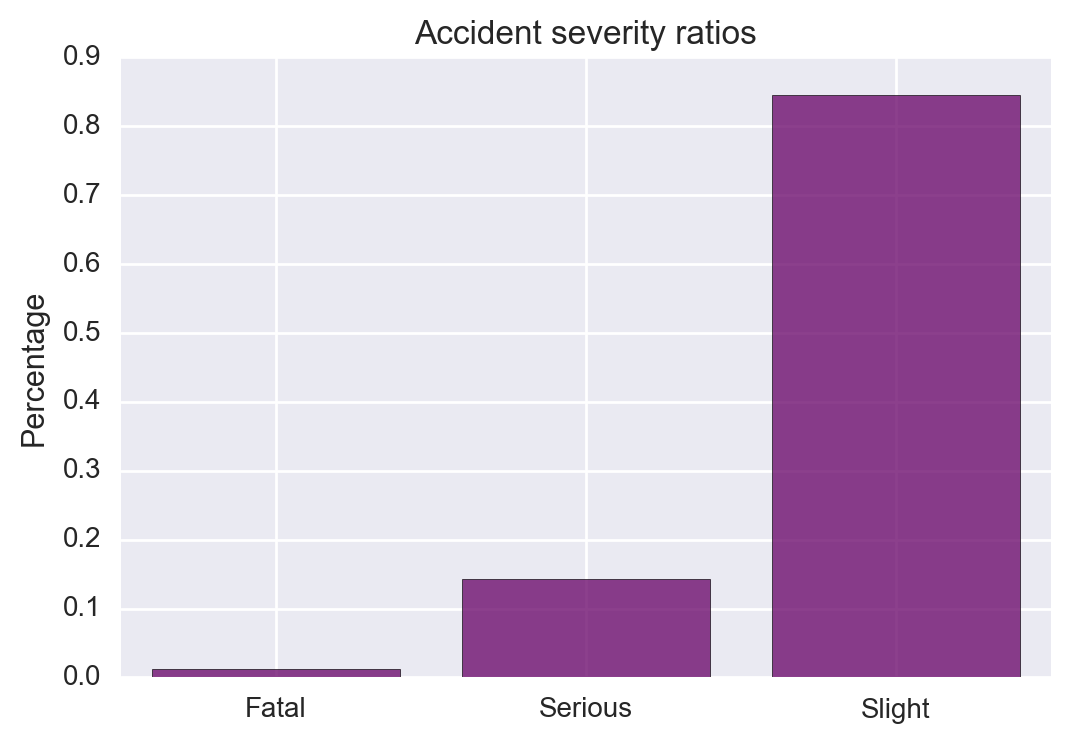

In [87]:
objects = sev_ratios["Severity"].values
y_pos = np.arange(len(objects))
perc = sev_ratios["Percentage"]
 
plt.bar(y_pos, perc, align='center', alpha=0.75, color = '#660066', )
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Accident severity ratios')
plt.show()

Severity of accidents is going to be our target variable in the modeling phase.  The chart shows that huge majority of the accidents belong to the 'slight' category, with remaining two categories being much smaller. This could pose a problem with class imbalance and will have to be remedied before running the models.

#### Accidents vs speed limit

In [88]:
accidents.Speed_limit.value_counts()

30    89615
60    19076
40    11803
70     9626
50     5624
20     4290
10        2
0         1
Name: Speed_limit, dtype: int64

Looks like there is an error in the data - there can't be speed limit 0. We are going to drop this row.

In [89]:
accidents= accidents[accidents.Speed_limit!=0]

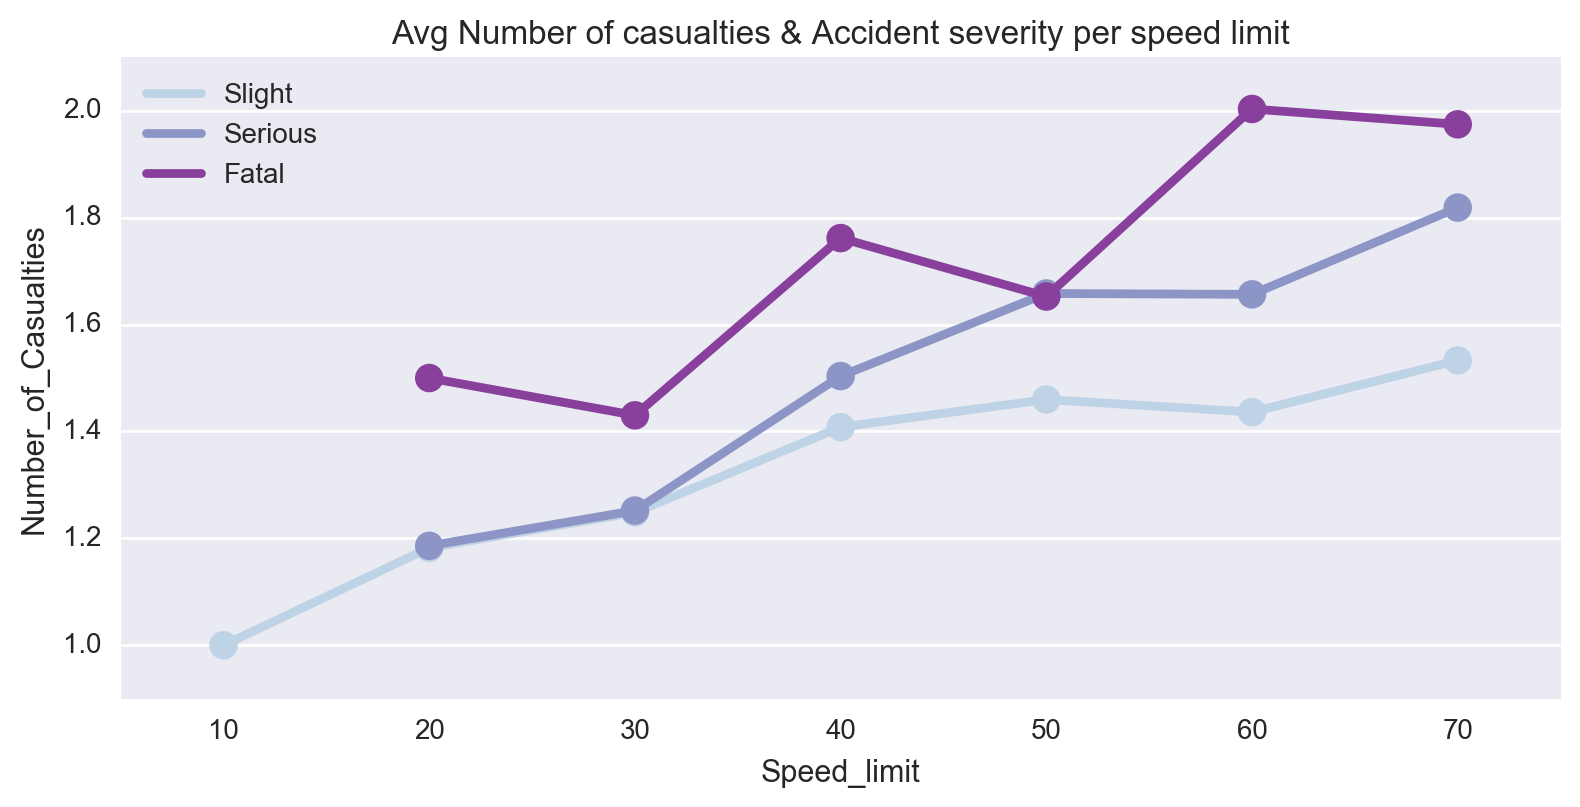

In [90]:
sns.factorplot(x="Speed_limit", y="Number_of_Casualties", hue = "Accident_Severity", data=accidents,
                ci=None, size =4, aspect=2, palette = "BuPu", legend=None, kind='point')
plt.legend(['Slight','Serious', 'Fatal'], loc='upper left')
plt.title("Avg Number of casualties & Accident severity per speed limit")
plt.ylim(0.9, 2.1)
plt.show()

In general, the severity of accidents as well as the number of casualties increase with speed.

#### Number of vehicles and number of casualties

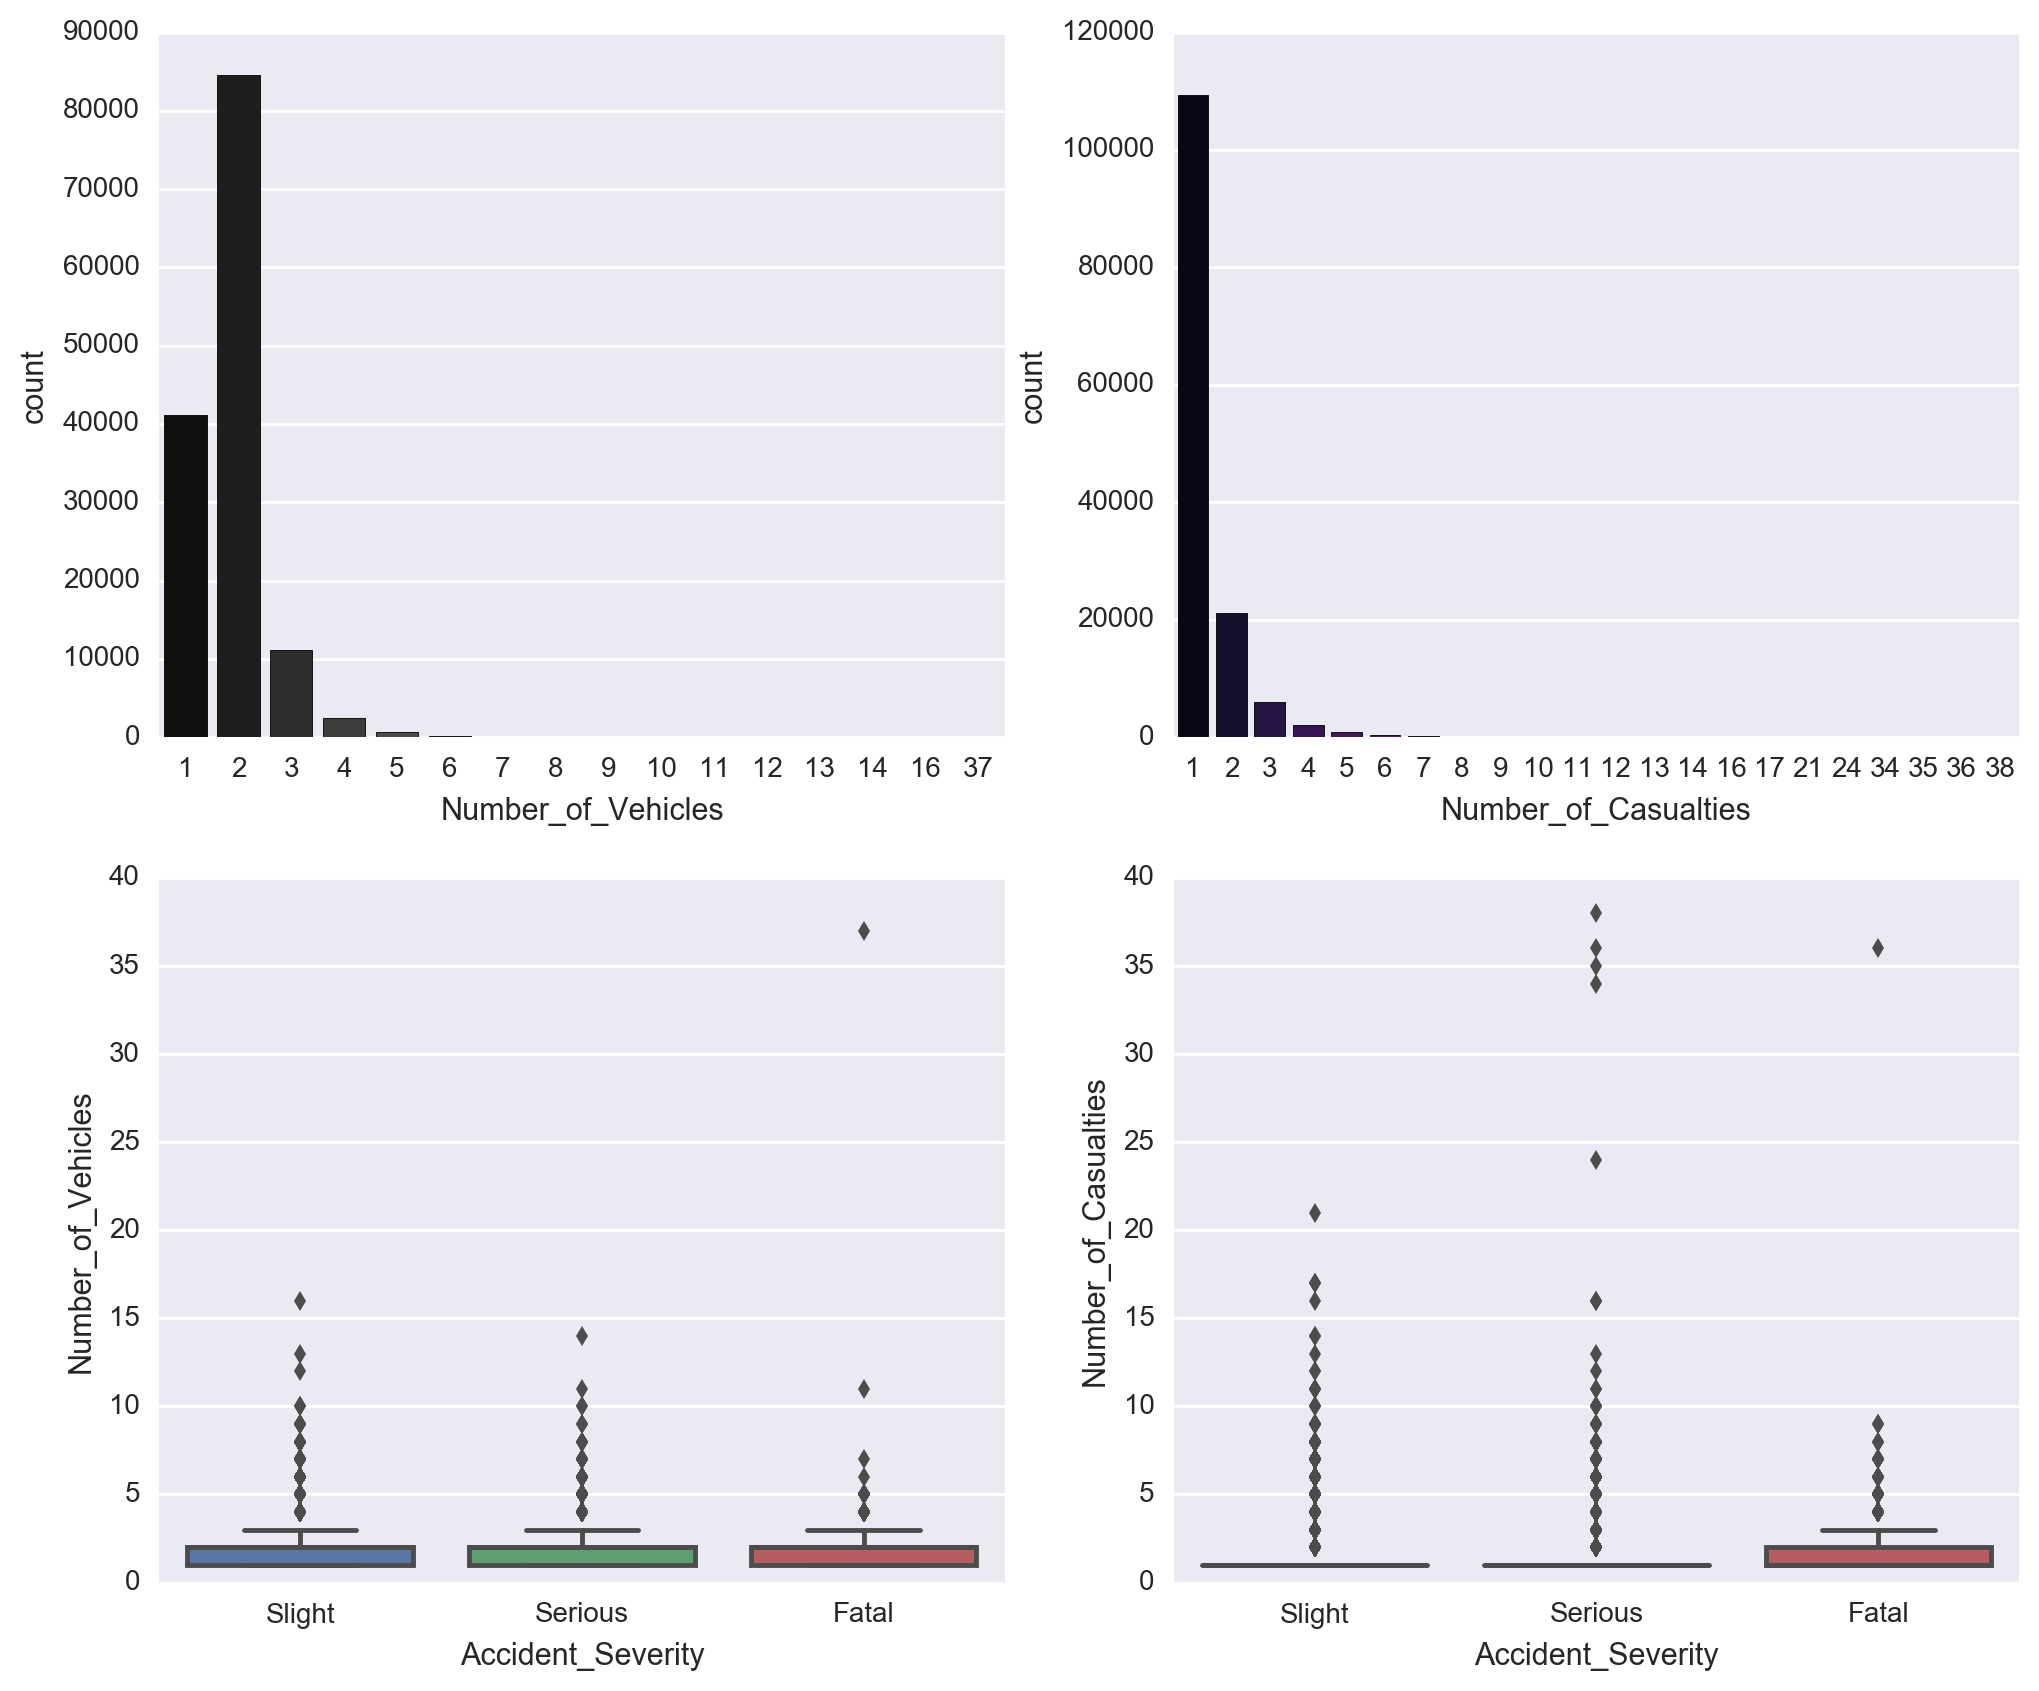

In [91]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
sns.countplot(x="Number_of_Vehicles", data=accidents, palette="gray", ax=axs[0,0])
sns.countplot(x="Number_of_Casualties", data=accidents, palette="inferno", ax=axs[0,1])
sns.boxplot(x="Accident_Severity", y="Number_of_Vehicles", data=accidents, ax=axs[1,0])
sns.boxplot(x="Accident_Severity", y="Number_of_Casualties", data=accidents, ax=axs[1,1]) 
plt.show()

As we can see in the above plots, there are some significant outliers where the number of vehicles and casualties is higher than 5. We need to reengineer these features a little, decreasing the number of classes, otherwise they are going to cause problems when creating dummy variables in the modelling phase. Both features can betransformed in the following classes: '1', '2', '3' and '>3'.

In [92]:
accidents.Number_of_Vehicles = accidents.Number_of_Vehicles.apply(lambda x: '>3' if x>3 else x)
accidents.Number_of_Casualties = accidents.Number_of_Casualties.apply(lambda x: '>3' if x>3 else x)

#### Accidents and time

(1) Accidents per day hour of the day

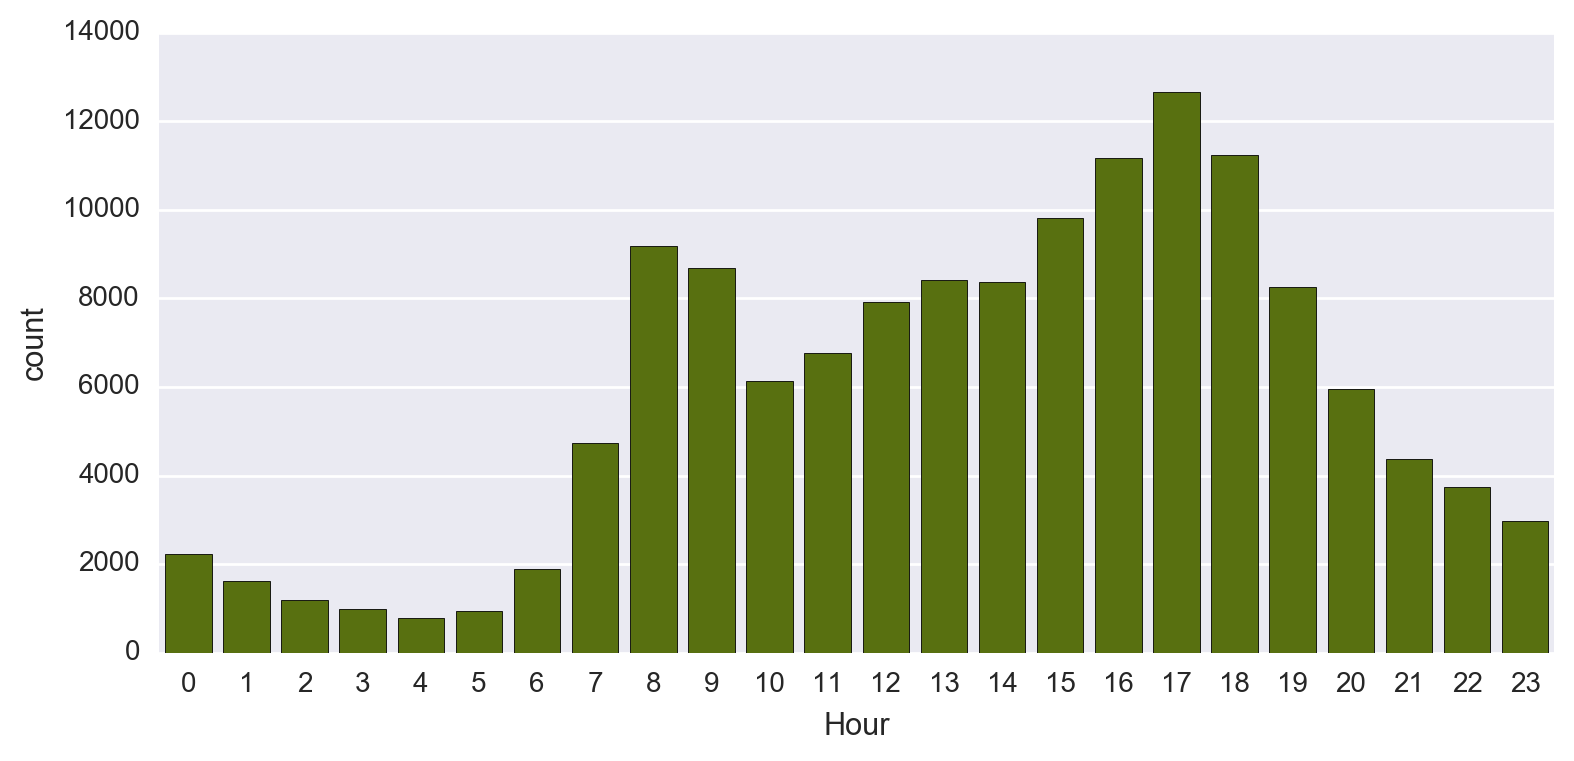

In [93]:
plt.figure(figsize = (9, 4))
sns.countplot(x="Hour", data=accidents, color='#608000')
plt.show()

There are two maximums per day when it comes to accidents frequency, both not surprisingly associated with peak hours on the roads, where most commuters are active.

(2) Accidents per day of the week

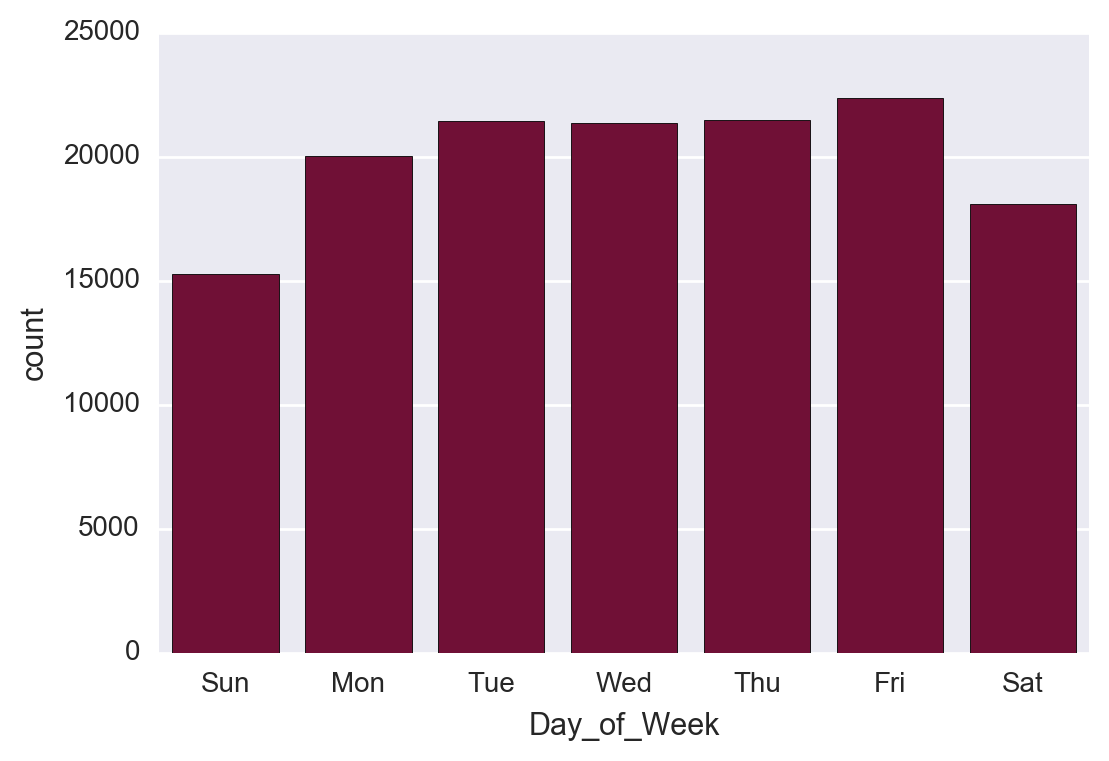

In [94]:
plt.figure(figsize = (6, 4))
sns.countplot(x="Day_of_Week", data=accidents, color= '#800033', order = ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat') )
plt.xticks(arange(7), ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'))
plt.show()

The least accidents in 2015 happened on weekends and the most on Fridays. We may possibly create another binary column that would distinguish between weekends and weekdays.

But is any of the days particularly deadly?

In [95]:
gr_week  = accidents.groupby(by=['Day_of_Week', 'Accident_Severity']).sum().iloc[:,:1]
gr_week = gr_week.unstack(level=0) #.plot(kind='bar', subplots=False)
gr_week.columns = gr_week.columns.droplevel()
cols = ['Sun',"Mon", "Tue", 'Wed', 'Thu', 'Fri', 'Sat']
gr_week=gr_week[cols]
gr_week = gr_week.T
gr_week.reset_index(inplace=True)
gr_week.columns.name = None
gr_week["Sum_all"] = gr_week["Fatal"] + gr_week["Serious"] + gr_week["Slight"]
gr_week['Fatal_Perc_out_all_Fatal'] = gr_week["Fatal"]/gr_week["Fatal"].sum()*100 #number of fatal accidents on a day out of all fatal accidents
gr_week

,Day_of_Week,Fatal,Serious,Slight,Sum_all,Fatal_Perc_out_all_Fatal
0,Sun,249070,2840173,11580775,14670018,15.570865
1,Mon,165018,2885534,16929956,19980508,10.316269
2,Tue,225931,3197992,17767896,21191819,14.124307
3,Wed,257579,3134737,17583780,20976096,16.102814
4,Thu,204833,2790656,17942816,20938305,12.805344
5,Fri,231258,3345603,18275893,21852754,14.457330
6,Sat,265901,2974851,14688610,17929362,16.623072


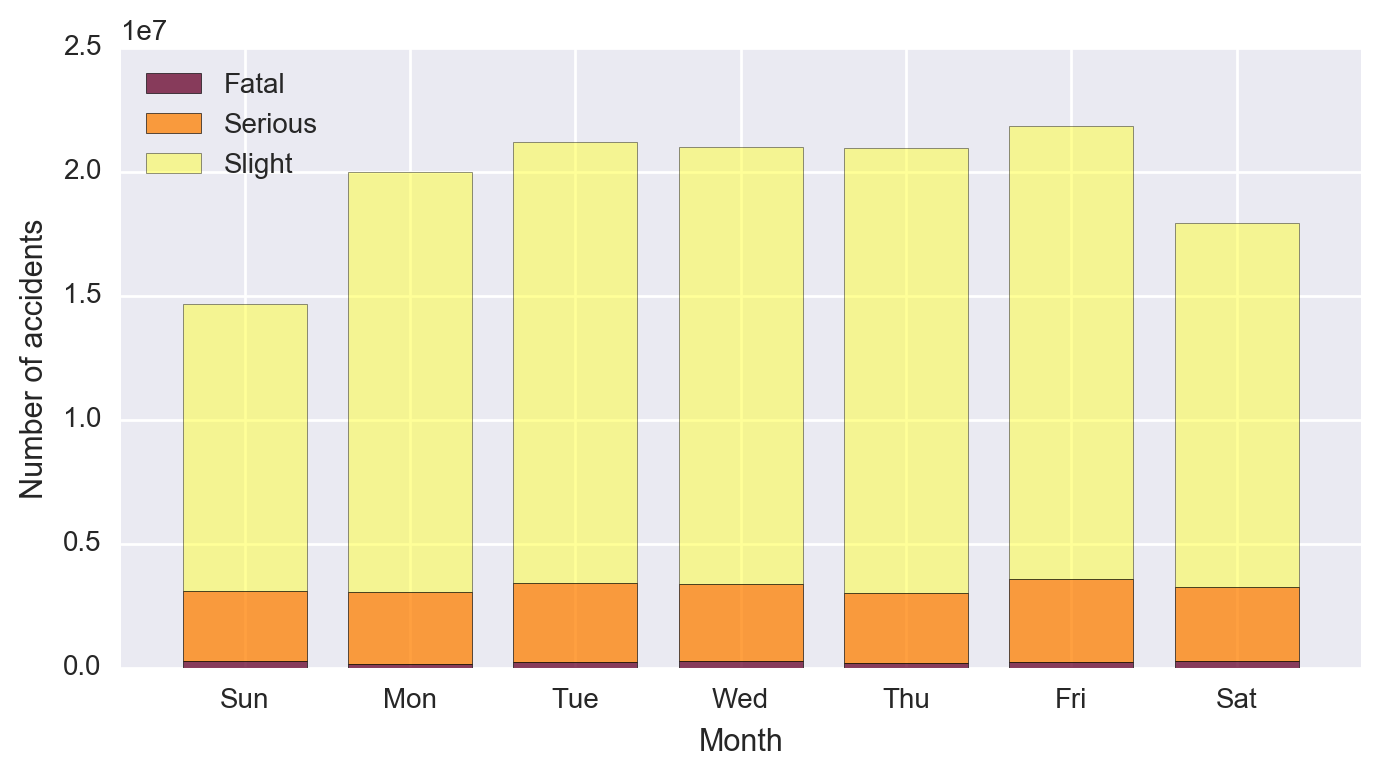

In [96]:
f, ax1 = plt.subplots(1, figsize=(8,4))
bar_width = 0.75
bar_l = [i+1 for i in range(len(gr_week['Fatal']))]
tick_pos = [i+(bar_width/2) for i in bar_l]


ax1.bar(bar_l, gr_week['Fatal'], width=bar_width, label='Fatal', alpha=0.75, color='#660029')

ax1.bar(bar_l, gr_week['Serious'], width=bar_width, bottom=gr_week['Fatal'], label='Serious', alpha=0.75, color='#ff8000')

ax1.bar(bar_l, gr_week['Slight'], width=bar_width, bottom=[i+j for i,j in zip(gr_week['Fatal'],gr_week['Serious'])],
        label='Slight', alpha=0.5, color='#ffff33')

plt.xticks(tick_pos, gr_week['Day_of_Week'])
ax1.set_ylabel("Number of accidents")
ax1.set_xlabel("Month")
plt.legend(loc=2)

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.show()

It is not easy to see in the plot, because the fatal accidents are thankfully a very small part of all accidents, however from the column Fatal Perc in the table just above the plot we can see that the days on which least accidents occur, ie on Saturdays and Sundays, the percentage of fatal accidents (out of all fatal accidents) is the highest. 

(3) Accidents per month

In [97]:
gr_month  = accidents.groupby(by=['Month', 'Accident_Severity']).sum().iloc[:,:1]
gr_month = gr_month.unstack(level=0) #.plot(kind='bar', subplots=False)
gr_month.columns = gr_month.columns.droplevel()
cols = ["Jan", "Feb", 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
gr_month=gr_month[cols]
gr_m2 = gr_month.T
gr_m2.reset_index(inplace=True)
gr_m2.columns.name = None
gr_m2

,Month,Fatal,Serious,Slight
0,Jan,150550,1600221,9849736
1,Feb,89551,1493182,8499245
2,Mar,94725,1599614,9067747
3,Apr,124854,1767275,8825390
4,May,128683,1719819,8926321
5,Jun,137474,1677880,10048348
6,Jul,128440,1856319,10427708
7,Aug,146184,1854635,9154988
8,Sep,122298,1838000,10044664
9,Oct,180192,2001033,10175105


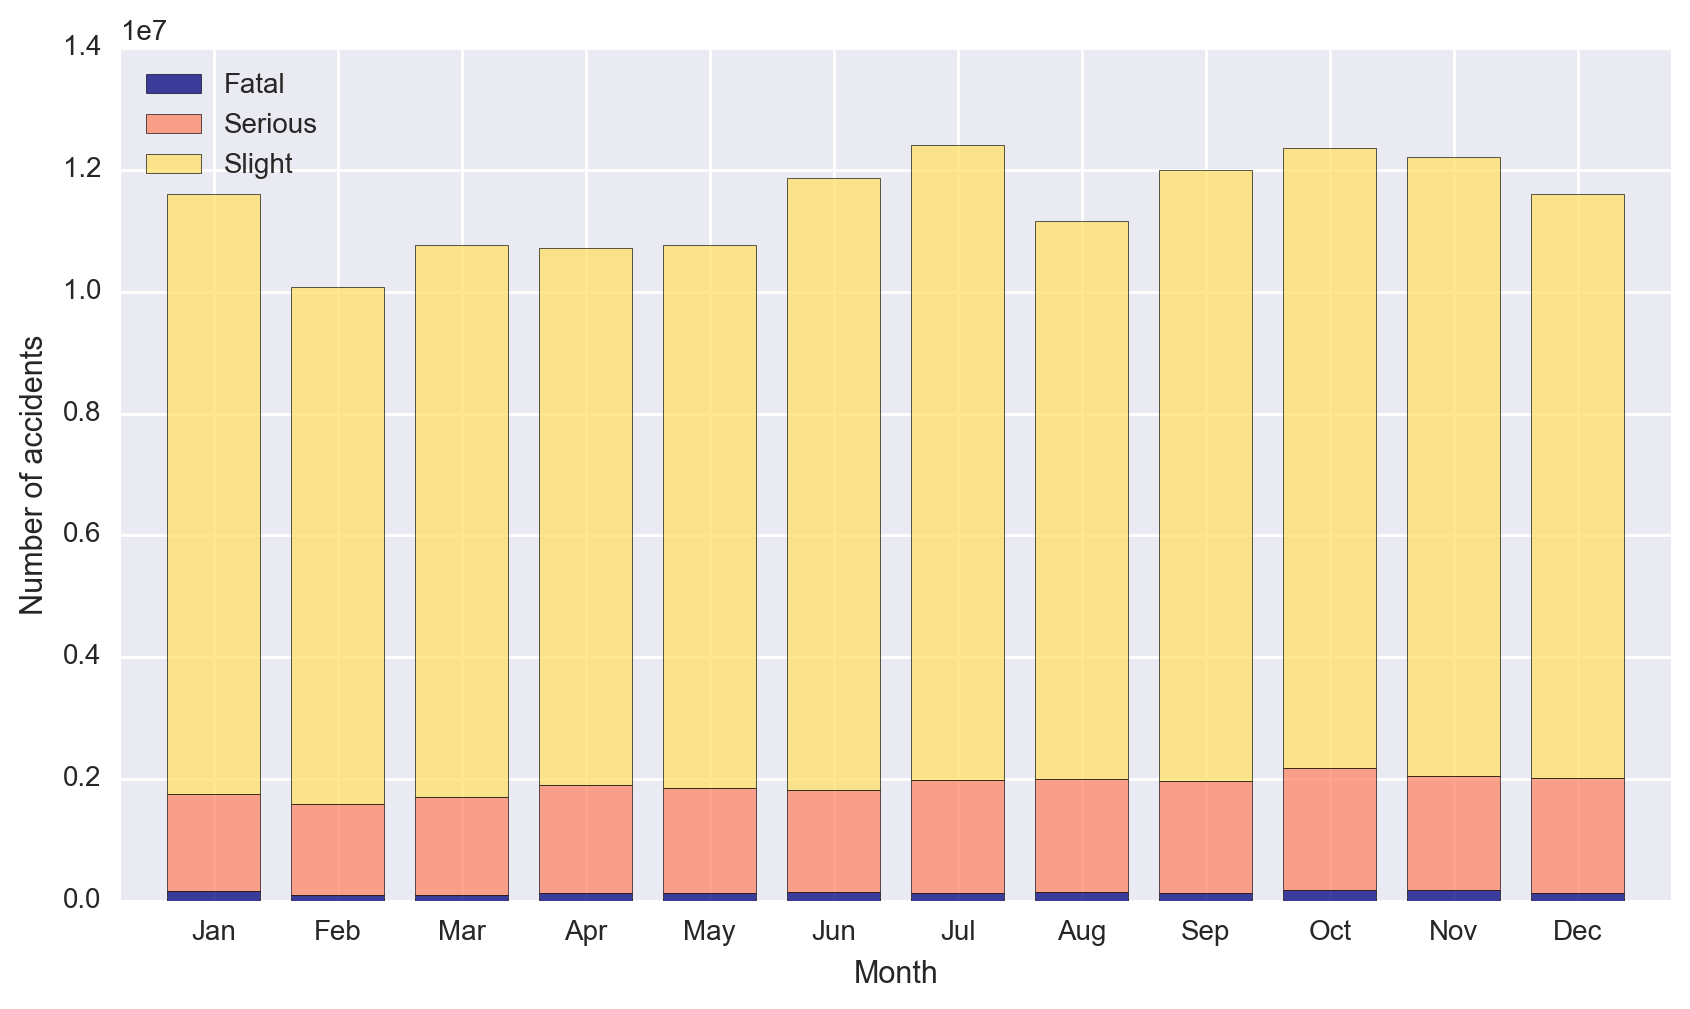

In [98]:
f, ax1 = plt.subplots(1, figsize=(10,5.5))
bar_width = 0.75
bar_l = [i+1 for i in range(len(gr_m2['Fatal']))]
tick_pos = [i+(bar_width/2) for i in bar_l]


ax1.bar(bar_l, gr_m2['Fatal'], width=bar_width, label='Fatal', alpha=0.75, color='#000080')

ax1.bar(bar_l, gr_m2['Serious'], width=bar_width, bottom=gr_m2['Fatal'], label='Serious', alpha=0.75, color='#ff8566')

ax1.bar(bar_l, gr_m2['Slight'], width=bar_width, bottom=[i+j for i,j in zip(gr_m2['Fatal'],gr_m2['Serious'])],
        label='Slight', alpha=0.75, color='#ffe066')

plt.xticks(tick_pos, gr_m2['Month'])
ax1.set_ylabel("Number of accidents")
ax1.set_xlabel("Month")
plt.legend(loc=2)

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.show()

Contrary to the intuition, the most accidents didn't happen in the winter months with the largest light deficit (December, January) but in the summer(July) and autumn (September, October, November). The months with the least number of accidents are February (probably due to its shortness), March and April. However from the stacked histogram and the table above we can see that some months that have relatively low total number of accidents, have higher ratio of fatal accidents, like August or December .



(4) Accidents per days of the year

The below plot shows us a pattern where peaks generally correspond with Fridays and downs with wekeends.

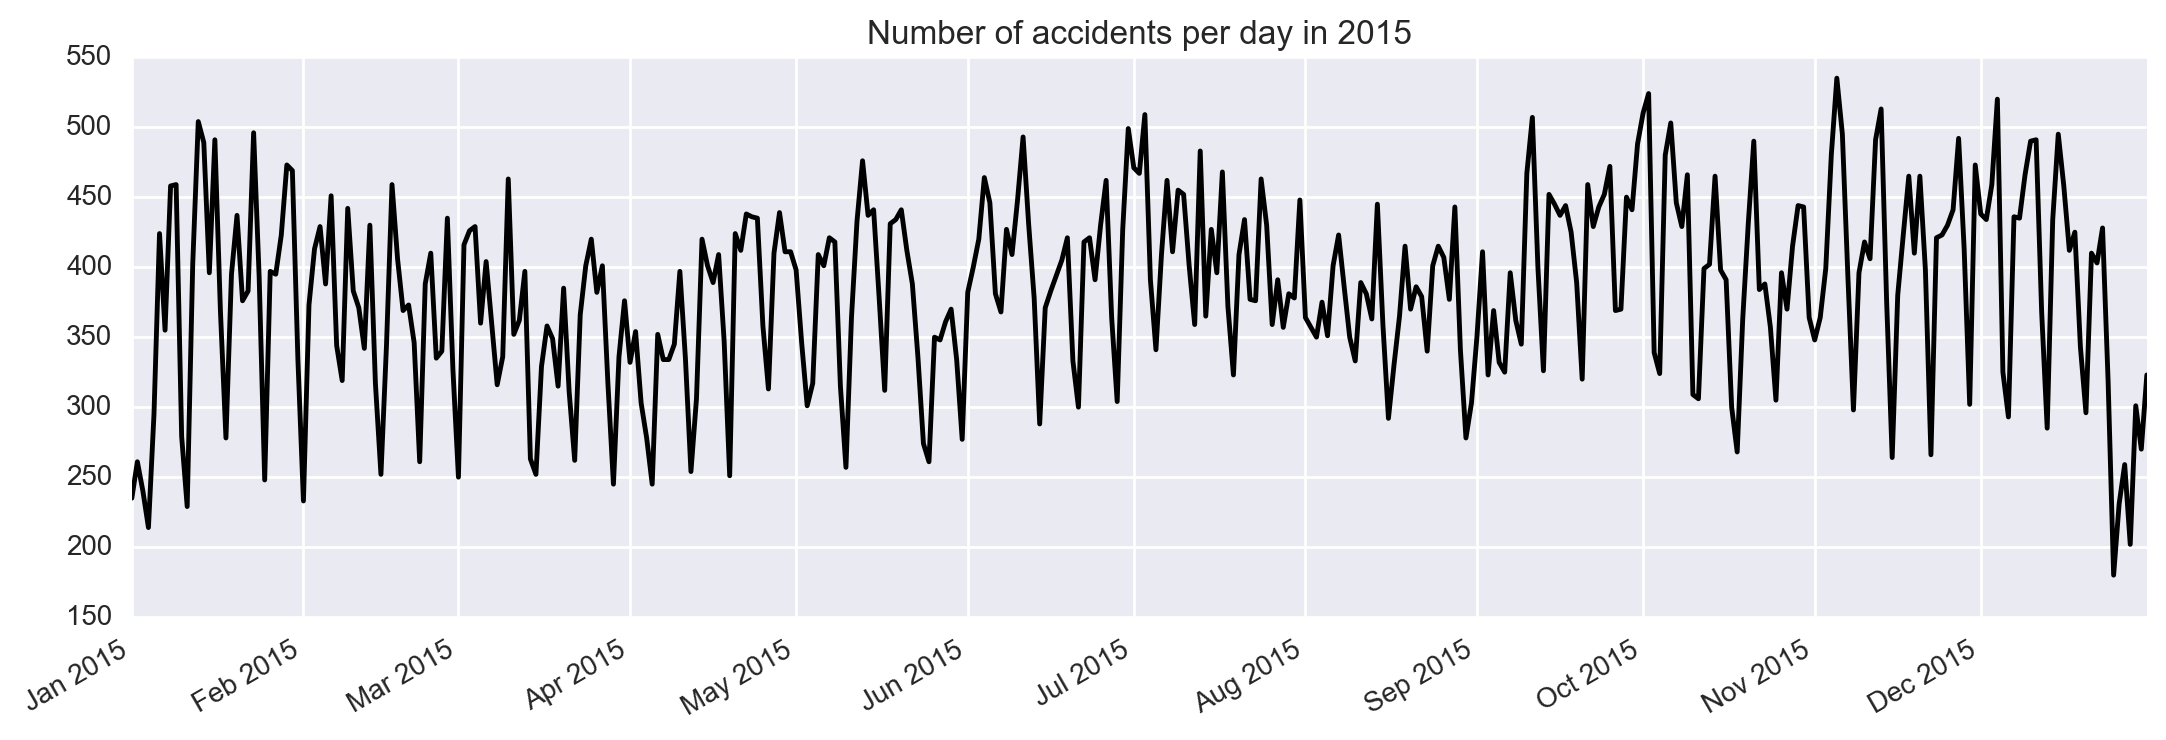

In [99]:
accidents['Date'] = pd.to_datetime(accidents['Date'], dayfirst = True)
gr_by_date = accidents.groupby(by="Date", as_index=False).count()

plt.figure(figsize = (13, 4))
plt.plot(gr_by_date.Date, gr_by_date.Accident_Index, c='k')
plt.gcf().autofmt_xdate()
plt.title('Number of accidents per day in 2015')
plt.show()

#### Accidents vs Weather

In [100]:
gr_by_weather = accidents.groupby(by=["Weather_Conditions"], as_index=True).count()
gr_by_weather = gr_by_weather.iloc[:,:1]
gr_by_weather['Ratios'] = gr_by_weather['Accident_Index']/gr_by_weather["Accident_Index"].sum()
gr_by_weather.index = ['Fine no high winds', 'Raining no high winds', 'Snowing no high winds', 'Fine + high winds',
                       'Raining + high winds', 'Snowing + high winds', 'Fog or mist', 'Other']
#Data missing or out of range]
gr_by_weather.reset_index(inplace=True)
gr_by_weather.columns = ["Weather_Conditions", "Accidents_Number", "Percentage"]
gr_by_weather


,Weather_Conditions,Accidents_Number,Percentage
0,Fine no high winds,113935,0.813612
1,Raining no high winds,2352,0.016796
2,Snowing no high winds,662,0.004727
3,Fine + high winds,4451,0.031785
4,Raining + high winds,15557,0.111093
5,Snowing + high winds,2365,0.016889
6,Fog or mist,540,0.003856
7,Other,174,0.001243


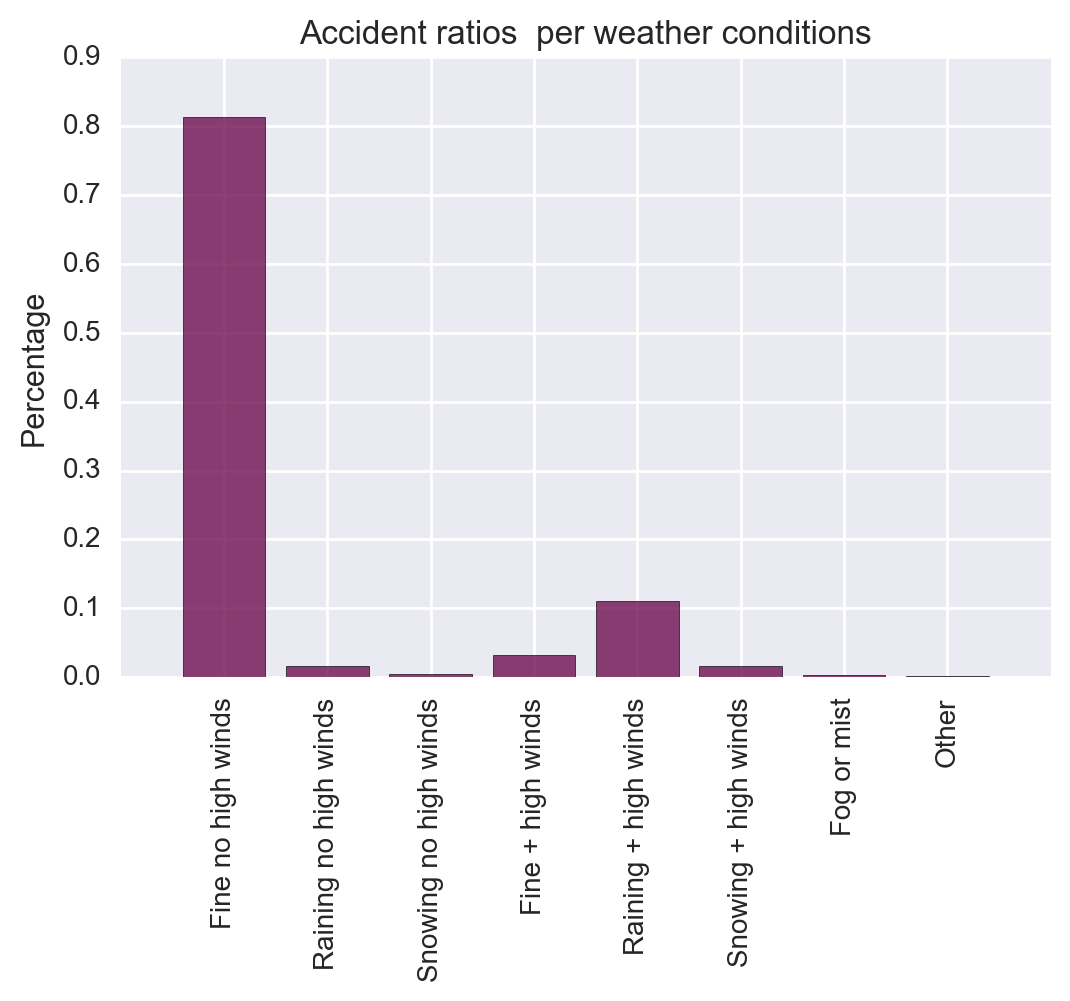

In [101]:
objects = gr_by_weather["Weather_Conditions"].values
y_pos = np.arange(len(objects))
perc = gr_by_weather["Percentage"]
 
plt.bar(y_pos, perc, align='center', alpha=0.75, color = '#660046')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Percentage')
plt.title('Accident ratios  per weather conditions')
 
plt.show()

Huge majority of accidents (over 80%) happen in a fine weather, the next most numerous weather factor is rainy, windy weather in which abount 10% accidents occur. 

#### Accidents in urban vs rural areas

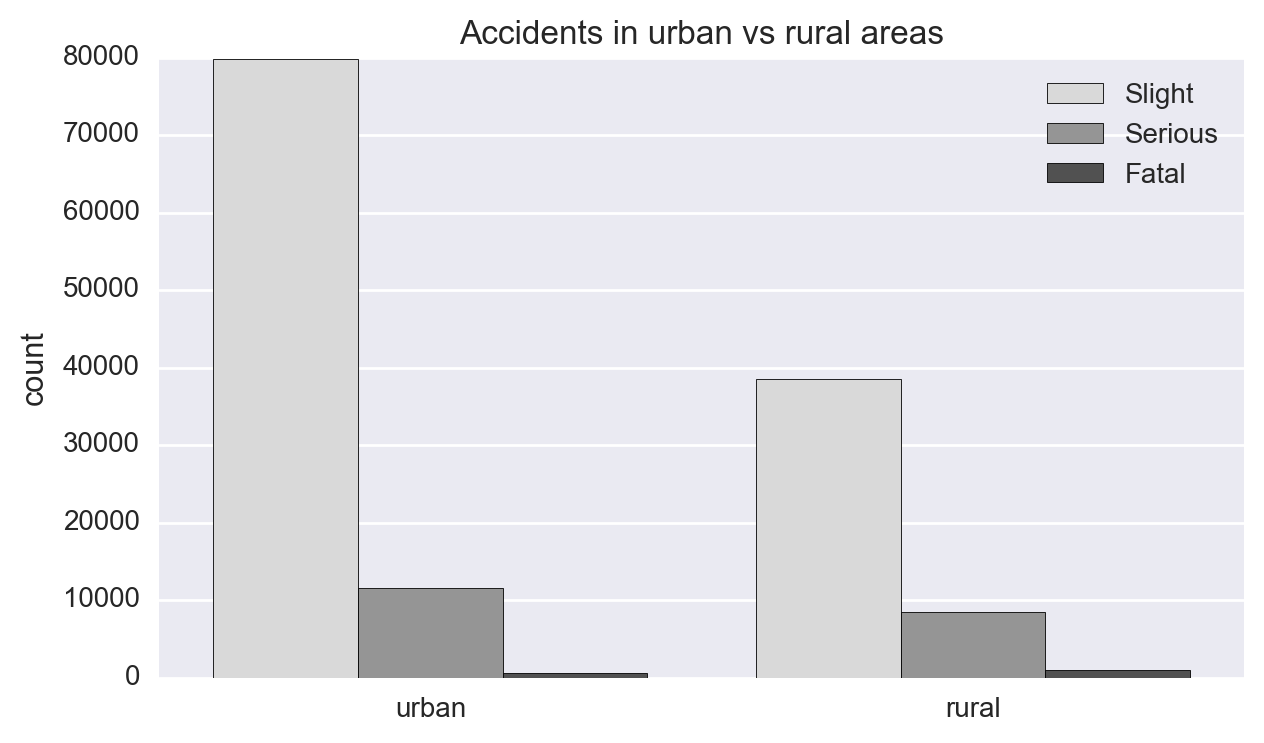

In [102]:
plt.figure(figsize = (7, 4))
sns.countplot(x="Urban_or_Rural_Area", data=accidents, palette='Greys', hue="Accident_Severity")
plt.xticks(arange(2),('urban', 'rural'))
plt.legend(['Slight','Serious','Fatal'], loc='upper right')
plt.title("Accidents in urban vs rural areas")
plt.xlabel('')
plt.show()

The total number of accidents is much higher in the urban areas, however rural areas have relatively large number of severe and fatal accidents. Perhaps drunk driving or speed could be the reason for that.


### Merging two dataframes together

Lastly, for the purpose of modeling the two datasets will need to be merged to create one bigger table with all the features that can become potential predictors. We can do the merge on the Accident Index column which occurs in both original tables.

In [103]:
main = pd.merge(vehicles, accidents, on='Accident_Index', how='left')

In [104]:
main.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Skidding_and_Overturning,Vehicle_Leaving_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Vehicle_Index,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Month,Ped_Crossing
0,201501BS70001,1,goods,0,Turning right,0,0,0,Front,1,Male,-1,36 - 45,201501BS70001.1,Metropolitan Police,Slight,1,1,2015-01-12,Mon,18:45,C,0.0,Single cgwy,30.0,T or staggered junction,Give way/uncontr,Unclassified,0.0,Dk-lit,Fine/no wind,Dry,0.0,0.0,Urban,19.0,Jan,0.0
1,201501BS70002,1,car,0,Turning right,0,0,0,Front,1,Male,-1,21 - 25,201501BS70002.1,Metropolitan Police,Slight,1,1,2015-01-12,Mon,07:50,Unclassified,0.0,Single cgwy,30.0,T or staggered junction,Give way/uncontr,A,3218.0,Daylight,Fine/no wind,Dry,0.0,0.0,Urban,8.0,Jan,0.0
2,201501BS70004,1,car,0,Turning right,0,0,0,Front,1,Male,30,26 - 35,201501BS70004.1,Metropolitan Police,Slight,1,1,2015-01-12,Mon,18:08,B,415.0,Single cgwy,30.0,Mini-roundabout,Give way/uncontr,Unclassified,0.0,Dk-lit,Rain/no wind,Wet,0.0,0.0,Urban,18.0,Jan,1.0
3,201501BS70005,1,car,0,Turning right,0,0,0,Front,1,Male,-1,21 - 25,201501BS70005.1,Metropolitan Police,Slight,1,1,2015-01-13,Tue,07:40,B,450.0,Single cgwy,30.0,Crossroads,Give way/uncontr,Unclassified,0.0,Daylight,Fine/no wind,Wet,0.0,0.0,Urban,8.0,Jan,0.0
4,201501BS70008,1,bicycle,0,Going ahead,0,0,0,No impact,1,Male,48,46 - 55,201501BS70008.1,Metropolitan Police,Serious,2,1,2015-01-09,Fri,07:30,A,315.0,Single cgwy,30.0,Crossroads,Auto traffic signal,A,3220.0,Daylight,Rain/no wind,Wet,0.0,0.0,Urban,7.0,Jan,1.0


In [105]:
main.shape

(257845, 38)

We can drop some of the columns that served their purpose in the data analysis but that are not needed anymore, sucha as the Age of Driver, or Road Numbers.

In [106]:
main.drop(['Age_of_Driver', 'Time', '1st_Road_Number', '2nd_Road_Number', 'Date', 'Vehicle_Reference', 'Vehicle_Index'], 
          axis =1, inplace=True)
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257845 entries, 0 to 257844
Data columns (total 31 columns):
Accident_Index                      257845 non-null object
Vehicle_Type                        257845 non-null object
Towing_and_Articulation             257845 non-null int64
Vehicle_Manoeuvre                   257845 non-null object
Vehicle_Location-Restricted_Lane    257845 non-null int64
Skidding_and_Overturning            257845 non-null int64
Vehicle_Leaving_Carriageway         257845 non-null int64
1st_Point_of_Impact                 257845 non-null object
Was_Vehicle_Left_Hand_Drive?        257845 non-null int64
Sex_of_Driver                       257845 non-null object
Age_Band_of_Driver                  257845 non-null object
Police_Force                        257808 non-null object
Accident_Severity                   257808 non-null object
Number_of_Vehicles                  257808 non-null object
Number_of_Casualties                257808 non-null object
Day_of_We

As an effect of the merge we got some NaN values in the columns originating from Accidents table. The reason could be that we dropped some rows in the Vehicles table earlier and as a result there are no matching rows for the Accidents table. Let's examine the new table for the missing values:

In [107]:
main[pd.isnull(main).any(axis=1)].head()

,Accident_Index,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Skidding_and_Overturning,Vehicle_Leaving_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Month,Ped_Crossing
49044,201504EF15406,car,0,Slowing or stopping,0,0,0,Nearside,1,Female,26 - 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49045,201504EF15406,car,0,Parked,0,0,0,No impact,1,Female,36 - 45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80819,2015132150807,car,0,Going ahead,0,0,0,Front,1,Female,21 - 25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80820,2015132150807,goods,0,Going ahead,0,0,0,Offside,1,Male,46 - 55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81709,20151322B0546,car,0,Going ahead,0,0,0,Front,1,Male,26 - 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
main.dropna(axis=0, how='any', thresh=None, inplace=True)
main.shape

(257808, 31)

#### Saving the new dataframe in the csv file

In [109]:
#main.to_csv("/Users/Mags/Desktop/Capstone_datasets/UK_accidents_data/RoadSafetyData_2015/main_acc_veh_merged.csv", index=False)

###  Correlations & statistical analysis

To create correlation matrix and heatmap we will replace the values in columns with numbers. The data dictionaries have been provided on the [Data.gov.uk](https://data.gov.uk/dataset/road-accidents-safety-data) website as a collection of csv files (one file per column). We switched the keys and values of the dictionaries to replace names with numbers.

In [110]:
#Data dictionaties for non-numeric columns:

Vehicle_Type_dict = {'car':1, 'motorcycle': 2, 'goods':3, 'bicycle':4, 'minibus/bus':5, 'other':6}

Vehicle_Manouvre_dict = {'Going ahead': 1, 'Turning right':2, 'Slowing or stopping':3, 'Waiting to go - held up':4,
                         'Moving off':5, 'Overtaking':6, 'Parked':7, 'Turning left':8, 'Changing lane':9,
                         'Waiting to turn':10, 'Reversing':11, 'U-turn':12}

First_Point_of_Impact_dict = {'Back': 2, 'Front': 1, 'Nearside': 4, 'No impact': 0, 'Offside': 3}

Sex_of_Driver_dict = {'Male':1, 'Female':2, 'Unknown':3}

Age_Band_of_Driver_dict = {'0 - 5': 1, '11 - 15': 3, '16 - 20': 4, '21 - 25': 5, '26 - 35': 6, '36 - 45': 7,
 '46 - 55': 8, '56 - 65': 9, '6 - 10': 2, '66 - 75': 10, 'Over 75': 11, 'Unknown': -1}

Police_Force_dict = {'Avon and Somerset': 52, 'Bedfordshire': 40,'Cambridgeshire': 35, 'Central': 96,
 'Cheshire': 7, 'City of London': 48, 'Cleveland': 17, 'Cumbria': 3, 'Derbyshire': 30, 'Devon and Cornwall': 50,
 'Dorset': 55, 'Dumfries and Galloway': 98, 'Durham': 11, 'Dyfed-Powys': 63, 'Essex': 42, 'Fife': 94,
 'Gloucestershire': 53, 'Grampian': 92, 'Greater Manchester': 6, 'Gwent': 61, 'Hampshire': 44, 'Hertfordshire': 41,
 'Humberside': 16, 'Kent': 46, 'Lancashire': 4, 'Leicestershire': 33, 'Lincolnshire': 32, 'Lothian and Borders': 95,
 'Merseyside': 5, 'Metropolitan Police': 1, 'Norfolk': 36, 'North Wales': 60, 'North Yorkshire': 12,
 'Northamptonshire': 34, 'Northern': 91, 'Northumbria': 10, 'Nottinghamshire': 31, 'South Wales': 62,
 'South Yorkshire': 14, 'Staffordshire': 21, 'Strathclyde': 97, 'Suffolk': 37, 'Surrey': 45, 'Sussex': 47,
 'Tayside': 93, 'Thames Valley': 43,'Warwickshire': 23, 'West Mercia': 22,
 'West Midlands': 20, 'West Yorkshire': 13, 'Wiltshire': 54}

Accident_Severity_dict = {'Fatal':1, 'Serious':2, 'Slight':3}

Day_of_Week_dict = {'Sun':1, 'Mon':2, 'Tue':3, 'Wed':4, 'Thu':5, 'Fri':6, 'Sat':7}

First_Road_Class_dict = {'Mtwy':1, 'A(M)':2, 'A':3, 'B':4, 'C':5, 'Unclassified':6}

Road_Type_dict = {'Roundabout':1, 'One way street':2, 'Dual cgwy':3, 'Single cgwy':6,
         'Slip road':7, 'Unknown':9, 'One way street/Slip road':12}

Junction_Detail_dict = {'Crossroads': 6, 'Data missing or out of range': -1, 'Mini-roundabout': 2,
 'More than 4 arms (not roundabout)': 7, 'Not at junction or within 20 metres': 0, 'Other junction': 9,
 'Private drive or entrance': 8, 'Roundabout': 1, 'Slip road': 5,'T or staggered junction': 3}

Junction_Control_dict = {'Not at junct':0, 'Auth person':1, 'Auto traffic signal':2, 'Stop sign':3, 'Give way/uncontr':4}

Second_Road_Class_dict = {'Not at junct':0, 'Mtwy':1, 'A(M)':2, 'A':3, 'B':4, 'C':5, 'Unclassified':6}

Light_Conditions_dict ={'Daylight':1, 'Dk-lit':4, 'Dk-unlit':5, 'Dk-no light':6, 'Dk-light unknown':7}

Weather_Conditions_dict = {'Fine/no wind':1, 'Rain/no wind':2, 'Snow/no wind':3, 'Fine/wind':4, 'Rain/wind':5, 
                           'Snow/wind':6, 'Fog':7, 'Other':8, 'Unknown':9}

Road_Surface_Conditions_dict = {'Dry':1, 'Wet':2, 'Snow':3, 'Frost/ice':4, 'Flood':5, 'Oil':6, 'Mud':7}

Urban_or_Rural_Area_dict = {'Urban':1, 'Rural':2, 'Unallocated':3}

Month_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,
         'Nov':11, 'Dec':12}

Creating a new dataframe with numeric values only:

In [111]:
#New dataframe with numerical values only:
main_numeric = main

#Replacing values in columns:
main_numeric["Vehicle_Type"].replace(Vehicle_Type_dict, inplace=True)
main_numeric["Vehicle_Manoeuvre"].replace(Vehicle_Manouvre_dict, inplace=True)
main_numeric["1st_Point_of_Impact"].replace(First_Point_of_Impact_dict, inplace=True)
main_numeric["Sex_of_Driver"].replace(Sex_of_Driver_dict, inplace=True)
main_numeric["Age_Band_of_Driver"].replace(Age_Band_of_Driver_dict, inplace=True)
main_numeric["Police_Force"].replace(Police_Force_dict, inplace=True)
main_numeric["Accident_Severity"].replace(Accident_Severity_dict, inplace=True)
main_numeric["Day_of_Week"].replace(Day_of_Week_dict, inplace=True)
main_numeric["1st_Road_Class"].replace(First_Road_Class_dict, inplace=True)
main_numeric["Road_Type"].replace(Road_Type_dict, inplace=True)
main_numeric["Junction_Detail"].replace(Junction_Detail_dict, inplace=True)
main_numeric["Junction_Control"].replace(Junction_Control_dict, inplace=True)
main_numeric["2nd_Road_Class"].replace(Second_Road_Class_dict, inplace=True)
main_numeric["Light_Conditions"].replace(Light_Conditions_dict, inplace=True)
main_numeric["Weather_Conditions"].replace(Weather_Conditions_dict, inplace=True)
main_numeric["Road_Surface_Conditions"].replace(Road_Surface_Conditions_dict, inplace=True)
main_numeric["Urban_or_Rural_Area"].replace(Urban_or_Rural_Area_dict, inplace=True)
main_numeric["Month"].replace(Month_dict, inplace=True)

In [112]:
main_numeric.head()

,Accident_Index,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Skidding_and_Overturning,Vehicle_Leaving_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Month,Ped_Crossing
0,201501BS70001,3,0,2,0,0,0,1,1,1,7,1,3,1,1,2,5,6,30.0,3,4,6,4,1,1,0.0,0.0,1,19.0,1,0.0
1,201501BS70002,1,0,2,0,0,0,1,1,1,5,1,3,1,1,2,6,6,30.0,3,4,3,1,1,1,0.0,0.0,1,8.0,1,0.0
2,201501BS70004,1,0,2,0,0,0,1,1,1,6,1,3,1,1,2,4,6,30.0,2,4,6,4,2,2,0.0,0.0,1,18.0,1,1.0
3,201501BS70005,1,0,2,0,0,0,1,1,1,5,1,3,1,1,3,4,6,30.0,6,4,6,1,1,2,0.0,0.0,1,8.0,1,0.0
4,201501BS70008,4,0,1,0,0,0,0,1,1,8,1,2,2,1,6,3,6,30.0,6,2,3,1,2,2,0.0,0.0,1,7.0,1,1.0


In [113]:
corr_main = main_numeric.corr()
corr_main

,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Skidding_and_Overturning,Vehicle_Leaving_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Police_Force,Accident_Severity,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Month,Ped_Crossing
Vehicle_Type,1.000000,0.152883,-0.063040,0.117203,-0.024848,-0.080112,-0.028724,0.029417,-0.176784,-0.041147,-0.037199,-0.057555,-0.002529,0.012280,0.001285,-0.070954,0.009760,0.022153,0.024788,-0.067342,-0.019027,-0.056765,-0.001840,-0.001613,-0.057181,-0.032987,-0.000535,0.036865
Towing_and_Articulation,0.152883,1.000000,0.018580,0.003312,0.019028,-0.005571,0.020876,0.158053,-0.047682,0.040314,0.020599,-0.030432,-0.000488,-0.093620,-0.060029,0.136388,-0.046983,-0.061301,-0.069588,0.002570,0.001686,0.001683,0.032487,0.010365,0.100081,-0.032153,-0.003273,-0.034664
Vehicle_Manoeuvre,-0.063040,0.018580,1.000000,0.053148,-0.125149,-0.109198,0.116820,0.024899,0.081630,0.039221,-0.032134,0.053730,0.008375,0.034290,0.011154,-0.093274,0.039759,0.044171,0.035684,-0.043999,-0.014124,-0.050095,-0.016000,-0.020175,-0.092321,0.000122,-0.001972,0.005378
Vehicle_Location-Restricted_Lane,0.117203,0.003312,0.053148,1.000000,-0.016594,0.012832,-0.003464,0.001398,-0.000096,-0.004086,0.011935,-0.013390,0.001492,0.020717,0.030248,-0.050198,0.029244,-0.003041,0.003690,-0.014341,0.002677,-0.014301,-0.008885,0.000848,-0.046528,-0.005998,-0.002687,0.002956
Skidding_and_Overturning,-0.024848,0.019028,-0.125149,-0.016594,1.000000,0.373353,-0.033010,-0.004783,-0.072831,-0.093012,0.095035,-0.072451,-0.009513,-0.032021,-0.002438,0.213713,-0.102488,-0.122781,-0.130391,0.075930,0.054073,0.179121,0.059710,0.044447,0.204200,-0.033267,-0.009155,-0.087170
Vehicle_Leaving_Carriageway,-0.080112,-0.005571,-0.109198,0.012832,0.373353,1.000000,0.001211,-0.005082,-0.045968,-0.042565,0.086264,-0.096182,-0.013607,-0.030162,0.005918,0.233310,-0.100579,-0.132658,-0.138552,0.109063,0.034001,0.122949,0.023300,0.034963,0.224360,-0.041927,-0.003938,-0.094087
1st_Point_of_Impact,-0.028724,0.020876,0.116820,-0.003464,-0.033010,0.001211,1.000000,0.009873,-0.009466,0.019618,-0.039512,0.026539,0.001172,-0.005338,-0.036306,-0.037629,0.020657,0.035019,0.031260,-0.016195,-0.014560,-0.027463,-0.002997,-0.026346,-0.044951,0.001344,-0.000740,0.010870
Was_Vehicle_Left_Hand_Drive?,0.029417,0.158053,0.024899,0.001398,-0.004783,-0.005082,0.009873,1.000000,-0.010786,0.007000,0.011874,-0.001540,0.000962,-0.032670,-0.025709,0.045434,-0.014420,-0.016983,-0.020385,-0.001570,0.002283,-0.001255,0.009480,0.001071,0.028079,-0.004028,0.000667,-0.009261
Sex_of_Driver,-0.176784,-0.047682,0.081630,-0.000096,-0.072831,-0.045968,-0.009466,-0.010786,1.000000,0.003400,0.034922,0.051917,-0.004192,0.070826,0.021655,-0.048504,-0.019998,-0.011527,-0.013222,-0.014115,0.016904,-0.003401,-0.008213,-0.004046,-0.026063,-0.001628,0.000249,-0.010143
Age_Band_of_Driver,-0.041147,0.040314,0.039221,-0.004086,-0.093012,-0.042565,0.019618,0.007000,0.003400,1.000000,0.026923,-0.032020,-0.001668,-0.033914,-0.008584,0.033633,0.000608,0.000852,-0.004842,-0.083003,-0.014551,-0.029580,0.003943,0.000664,0.048500,-0.031971,-0.004327,-0.004786


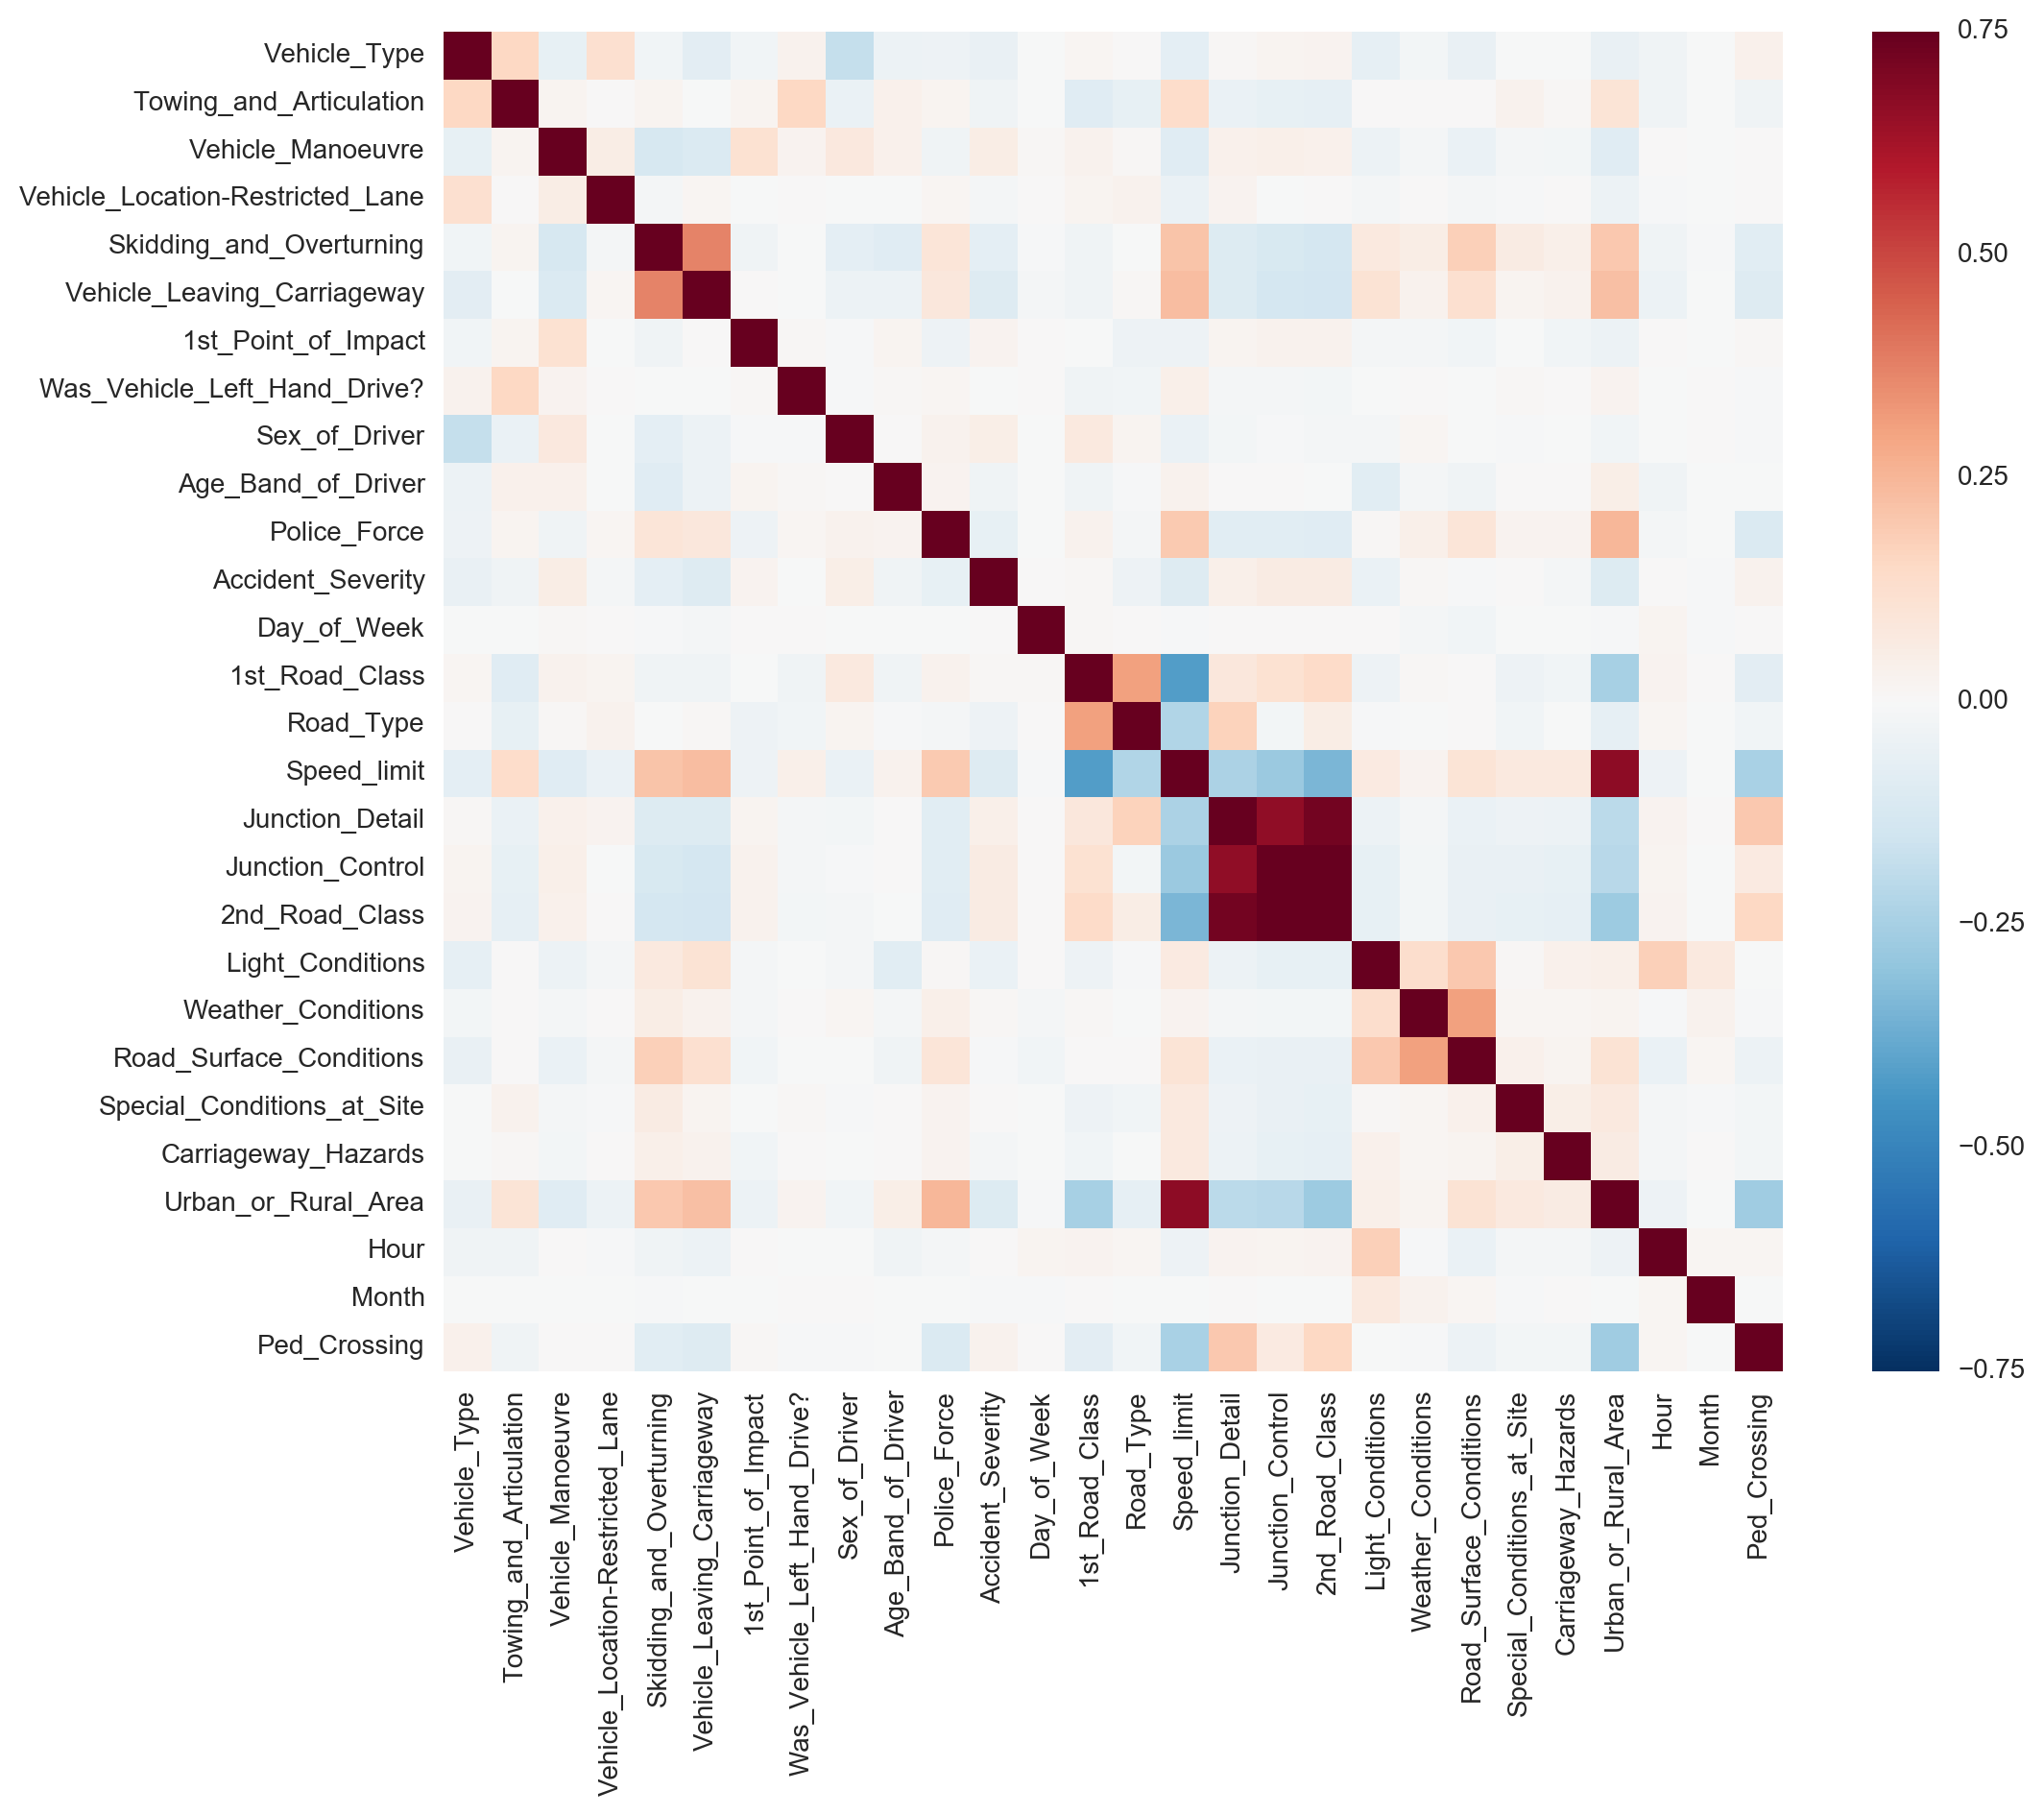

In [114]:
#heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_main,  vmax=.75, square=True);

The above heatmap and correlation matrix doesn't provide us with a lot of information due to the fact that nearly all the features are categorical and not encoded in meaningful way. However we can see the relationships between some features, such as those referring to junctions or road conditions.

Next we check the statistical description of the data with describe(), however, again, we deal here with categorical variables, so the result will not be meaningful:

In [115]:
main_numeric.describe()

,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Skidding_and_Overturning,Vehicle_Leaving_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Police_Force,Accident_Severity,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Month,Ped_Crossing
count,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000,257808.000000
mean,1.602794,0.015143,2.851475,0.020310,0.101676,0.104686,1.808140,1.005221,1.407776,6.877021,29.885632,2.844881,4.095854,4.019732,5.116595,38.702057,2.338845,2.227507,3.206103,1.906531,1.474206,1.291484,0.022288,0.014573,1.351370,13.826316,6.637211,0.179855
std,1.137397,0.122122,2.745130,0.141058,0.302223,0.306150,1.162455,0.072067,0.608151,1.757039,24.852480,0.391822,1.900378,1.449028,1.670504,14.212134,2.516111,1.873690,2.733873,1.617628,1.407671,0.529175,0.147619,0.119836,0.477399,5.027064,3.412383,0.384067
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,7.000000,3.000000,3.000000,3.000000,3.000000,30.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,10.000000,4.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7.000000,30.000000,3.000000,4.000000,3.000000,6.000000,30.000000,3.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,15.000000,7.000000,0.000000
75%,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,3.000000,1.000000,2.000000,8.000000,45.000000,3.000000,6.000000,6.000000,6.000000,50.000000,3.000000,4.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,18.000000,10.000000,0.000000
max,6.000000,1.000000,12.000000,1.000000,1.000000,1.000000,4.000000,2.000000,3.000000,11.000000,98.000000,3.000000,7.000000,6.000000,9.000000,70.000000,9.000000,4.000000,6.000000,7.000000,8.000000,5.000000,1.000000,1.000000,2.000000,23.000000,12.000000,1.000000
